# <font color="#8333ff">Projet 4 : Anticipez les besoins en consommation électrique de bâtiments

La ville de Seattle espère atteindre son objectif de ville neutre en émissions de carbone en 2050.
Nous allons nous intéresser de près aux émissions des bâtiments non destinés à l’habitation.

Nous avons obtenu des relevés minutieux par nos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux 
à obtenir, et à partir de ceux déjà réalisés, nous allons tenter de prédire les émissions de CO2 et la consommation
totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Notre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale
(taille et usage des bâtiments, mention de travaux récents, date de construction..)

Nous cherchons également à évaluer l’intérêt de **l’ENERGY STAR Score** pour la prédiction d’émissions, 
qui est fastidieux à calculer avec l’approche utilisée actuellement par notre équipe.

Quel renseignement nous donne l'indicateur ENERGYSTARScore?
Une EPA a calculé une note de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.

# <font color="#8333ff"> Partie 1: Exploration des données </font>

## <font color="blue">Sommaire</font>

1. [Import des librairies nécessaires pour l'exploration des données](#section_1)        
2. [Chargement de la base de données](#section_2)              
3. [Description et concaténation des bases de données](#section_3) </br>
    a.[Description des dataframes](#section_3_a)</br>
    b.[Concaténation des dataframes](#section_3_b)</br>
4. [Nettoyage des données](#section_4)</br>
    a.[Traitement des outliers](#section_4_a)</br>
    b.[Traitement des valeurs manquantes](#section_4_b)</br>
    c.[Sélection des variables à l'aide d'une heatmap](#section_4_c)</br>
    d.[Traitement des valeurs négatives](#section_4_d)</br>
    e.[Choix final des variables](#section_4_e)</br>

## <font color="red" id="section_1">1. Import des librairies nécessaires pour l'exploration des données</font>

In [1]:
#import des librairies dont nous aurons besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import json  
from pandas.io.json import json_normalize  

## <font color="red" id="section_2">2. Chargement de la base de données</font>

In [3]:
# Lecture des 2 fichiers 
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
#Chargement des métadonnées
with open('socrata_metadata_2015-building-energy-benchmarking.json') as jsonfile:
    metadata2015_json = json.load(jsonfile)
    metadata2015 = json_normalize(metadata2015_json)

with open('socrata_metadata_2016-building-energy-benchmarking.json') as jsonfile:
    metadata2016_json = json.load(jsonfile)
    metadata2016 = json_normalize(metadata2016_json)

C:\Users\laila\AppData\Local\Temp/ipykernel_17220/3611599966.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  metadata2015 = json_normalize(metadata2015_json)
C:\Users\laila\AppData\Local\Temp/ipykernel_17220/3611599966.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  metadata2016 = json_normalize(metadata2016_json)


In [5]:
#on montre toutes les colonnes et lignes
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

#suppression des messages d'avertissement
import warnings
warnings.filterwarnings('ignore')

## <font color="red" id="section_3">3. Description et concaténation des bases de données</font>

### <font color="blue" id="section_3_a">a. Description des dataframes</font>

In [6]:
#Regardons le nombre de lignes et colonnes du dataframe data
print(data2015.shape)
print(data2016.shape)

(3340, 47)
(3376, 46)


Nous avons 47 variables dans le dataframe de 2015 contre 46 variables dans celui de 2016.
Il y a donc des différences entre ces 2 dataframes.</br>
Voyons de quoi il s'agit.

In [7]:
data2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEner

In [8]:
list(data2015.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

In [9]:
data2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [10]:
list(data2016.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Lien permettant de mieux comprendre les colonnes de la dataframe data2015 :
    https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m  
        </br>
Lien permettant de mieux comprendre les colonnes de la dataframe data2016 :
    https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

On peut également retrouver ses informations à l'aide des métadonnées.

In [11]:
with open('socrata_metadata_2015-building-energy-benchmarking.json') as jsonfile:
  dict_json = json.load(jsonfile)

for d in dict_json['columns']:
    if 'fieldName' in d:
        print(f" column_name : {d['fieldName'][:100]}")
        if 'description' in d:
            print(f" description : {d['description'][:150]} \n")

 column_name : seattlebuildingid
 description : A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes. 

 column_name : datayear
 column_name : buildingtype
 description : City of Seattle building type classification. 

 column_name : primarypropertytype
 description : The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is 

 column_name : propertyname
 description : Official or common property name. 

 column_name : taxparcelidentificationnumber
 description : 	
Property King County PIN 

 column_name : location
 column_name : councildistrictcode
 description : Property City of Seattle council district. 

 column_name : neighborhood
 column_name : yearbuilt
 description : Year in which a property was constructed or underwent a complete renovation. 

 column_name : numberofbuildings
 column_name : numberoffloors
 

In [12]:
with open('socrata_metadata_2016-building-energy-benchmarking.json') as jsonfile:
  dict_json = json.load(jsonfile)

#print(json.dumps(filejson, indent = 4, sort_keys=True))

for d in dict_json['columns']:
    if 'fieldName' in d:
        print(f" column_name : {d['fieldName'][:100]}")
        if 'description' in d:
            print(f" description : {d['description'][:150]} \n")

 column_name : osebuildingid
 description : A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes. 

 column_name : datayear
 description : Calendar year (January-December) represented by each data record. 

 column_name : buildingtype
 description : City of Seattle building type classification. 

 column_name : primarypropertytype
 description : The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is 

 column_name : propertyname
 description : Official or common property name as entered in EPA’s Portfolio Manager. 

 column_name : address
 description : Property street address 

 column_name : city
 description : Property city 

 column_name : state
 description : Property state 

 column_name : zipcode
 description : Property zip 

 column_name : taxparcelidentificationnumber
 description : Property King County 

### <font color="blue" id="section_3_b">b. Concaténation des dataframes</font>

In [13]:
set(data2016.columns) - set(data2015.columns)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [14]:
# variables présentes dans les 2 dataframes
print("Les variables présentes dans data2015 et data2016 sont: ")
[variable for variable in data2015 if variable in data2016]

Les variables présentes dans data2015 et data2016 sont: 


['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

**Voici donc les variables qui sont en commun dans les 2 dataframes :** </br>
 'OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'Outlier',
 'DefaultData',
 'ComplianceStatus',</br>
   </br> 
**Quatre variables ne s'ecrivent pas pareils mais après vérification, sont identiques :**</br>
 'Comment', et 'Comments' </br>
 'ZipCode', et 'Zip Codes'</br>
 'GHGEmissions(MetricTonsCO2e)', et  'TotalGHGEmissions',</br>
 'GHGEmissionsIntensity(kgCO2e/ft2)', et  'GHGEmissionsIntensity']</br>
</br>




In [15]:
#Nous allons renommer les 4 variables de data_2016 pourqu'ils soient nommés comme ceux de data_2016
data2015.rename(columns={'Comment': 'Comments' }, inplace=True)
data2015.rename(columns={'Zip Codes': 'ZipCode' }, inplace=True)
data2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions' }, inplace=True)
data2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':  'GHGEmissionsIntensity' }, inplace=True)

Nous allons concaténer ses 2 dataframes, mais avant tout, nous allons vérifier que les types des variables identiques sont les 
memes.

In [16]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [17]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [18]:
#modification des types de certaines variables avant concaténation
data2015 = data2015.astype({"NumberofBuildings":'float64'})
data2015 = data2015.astype({"ZipCode":'float64'})
data2016 = data2016.astype({"NumberofFloors":'float64'})
data2016 = data2016.astype({"DefaultData":'object'})

In [19]:
liste=['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood','YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'Outlier', 'DefaultData', 'ComplianceStatus','Comments','ZipCode',
       'TotalGHGEmissions','GHGEmissionsIntensity']
data2015_pour_concat=data2015[liste]
data2016_pour_concat=data2016[liste]


In [20]:
#concaténation des 2 dataframes
data_concat=pd.concat([data2015_pour_concat, data2016_pour_concat], axis = 0,ignore_index=True)
print(data2015_pour_concat.shape)
print(data2016_pour_concat.shape)
print(data_concat.shape)

(3340, 41)
(3376, 41)
(6716, 41)


## <font color="red" id="section_4">4. Nettoyage des données</font>

In [21]:
#statistiques descriptives sur les variables du dataframe "data_concat"
data_concat.describe(include="all")

OSEBuildingID    DataYear    BuildingType   PrimaryPropertyType  \
count     6716.000000  6716.00000            6716                  6716   
unique            NaN         NaN               8                    32   
top               NaN         NaN  NonResidential  Low-Rise Multifamily   
freq              NaN         NaN            2921                  1985   
mean     20867.420488  2015.50268             NaN                   NaN   
std      11878.968174     0.50003             NaN                   NaN   
min          1.000000  2015.00000             NaN                   NaN   
25%      19934.000000  2015.00000             NaN                   NaN   
50%      23064.000000  2016.00000             NaN                   NaN   
75%      25868.250000  2016.00000             NaN                   NaN   
max      50226.000000  2016.00000             NaN                   NaN   

       PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
count          6716                          6714          6716.000000   
unique         6527                          3729                  NaN   
top       WAREHOUSE                    3224049012                  NaN   
freq              9                            10                  NaN   
mean            NaN                           NaN             4.445057   
std             NaN                           NaN             2.123749   
min             NaN                           NaN             1.000000   
25%             NaN                           NaN             3.000000   
50%             NaN                           NaN             4.000000   
75%             NaN                           NaN             7.000000   
max             NaN                           NaN             7.000000   

       Neighborhood    YearBuilt  NumberofBuildings  NumberofFloors  \
count          6716  6716.000000        6708.000000     6708.000000   
unique           19          NaN                NaN             NaN   
top        DOWNTOWN          NaN                NaN             NaN   
freq           1151          NaN                NaN             NaN   
mean            NaN  1968.101549           1.071407        4.695736   
std             NaN    33.020391           1.593505        5.476218   
min             NaN  1900.000000           0.000000        0.000000   
25%             NaN  1948.000000           1.000000        2.000000   
50%             NaN  1974.000000           1.000000        4.000000   
75%             NaN  1996.000000           1.000000        5.000000   
max             NaN  2015.000000         111.000000       99.000000   

        PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count       6.716000e+03         6716.000000            6.716000e+03   
unique               NaN                 NaN                     NaN   
top                  NaN                 NaN                     NaN   
freq                 NaN                 NaN                     NaN   
mean        9.281410e+04         9519.597975            8.329450e+04   
std         1.875062e+05        33868.050881            1.733470e+05   
min         1.128500e+04           -3.000000           -5.055000e+04   
25%         2.848700e+04            0.000000            2.727300e+04   
50%         4.400800e+04            0.000000            4.218500e+04   
75%         8.943125e+04            0.000000            8.112000e+04   
max         9.320156e+06       512608.000000            9.320156e+06   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
count                       6580                   6560   
unique                       488                     57   
top          Multifamily Housing    Multifamily Housing   
freq                        1728                   3265   
mean                         NaN                    NaN   
std                          NaN                    NaN   
min                          NaN                    NaN   
25%                         

### <font color="blue" id="section_4_a">a. Traitement des outliers</font>

Voyons les distributions des variables numériques.

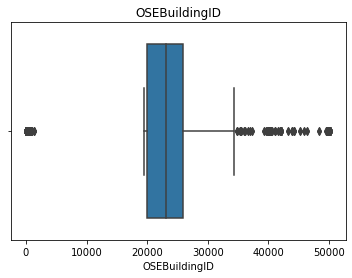

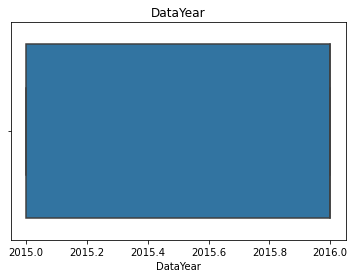

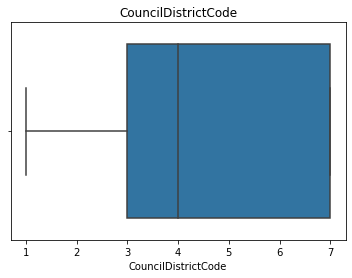

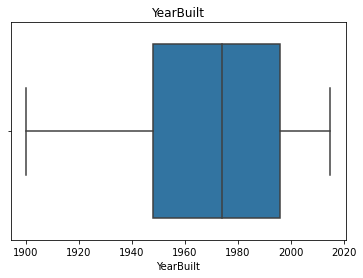

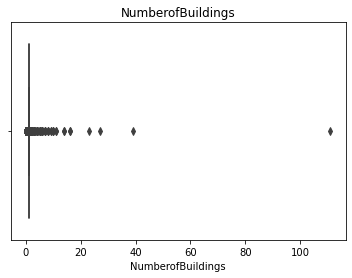

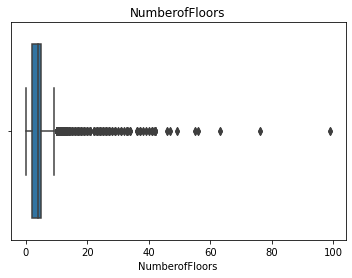

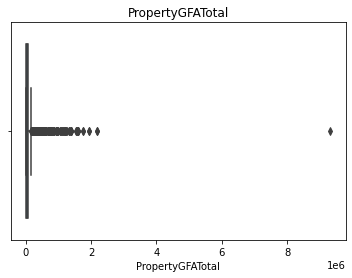

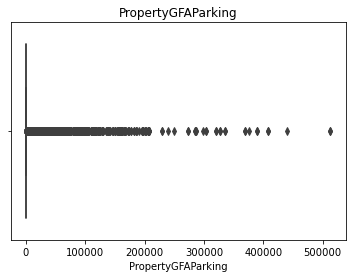

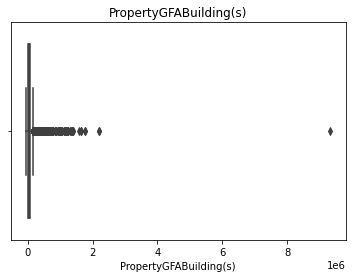

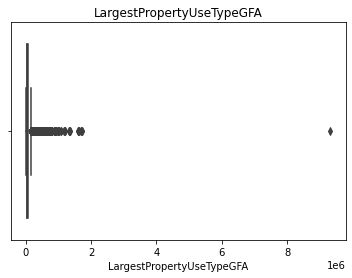

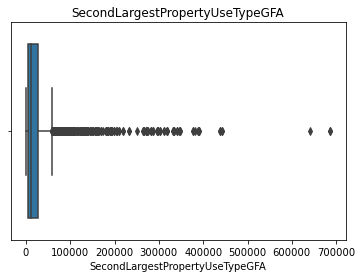

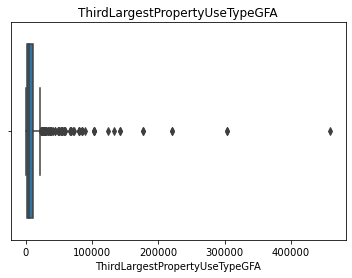

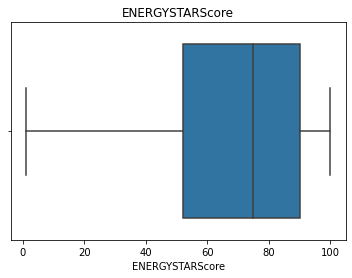

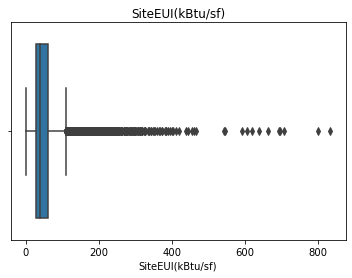

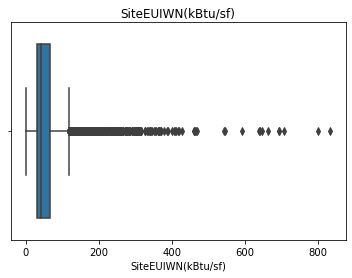

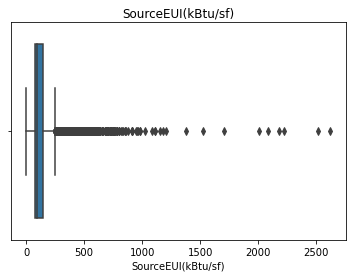

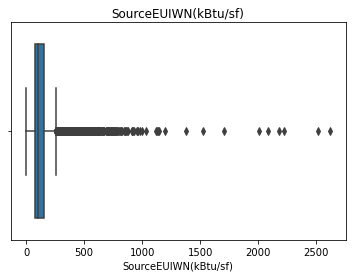

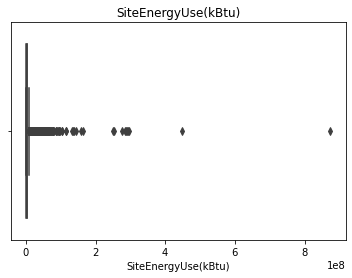

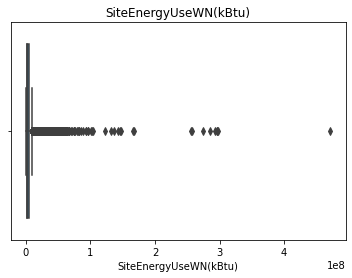

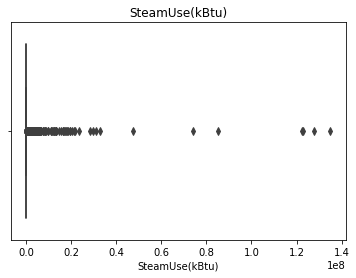

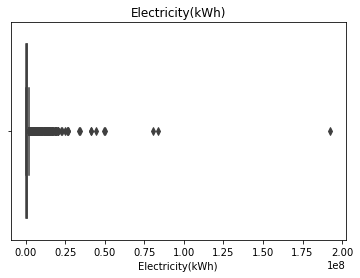

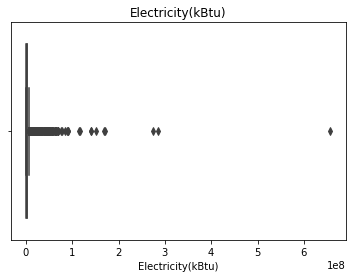

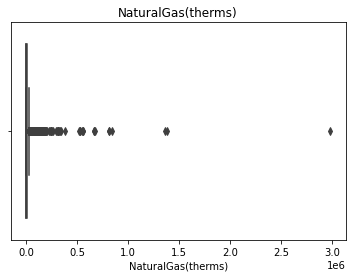

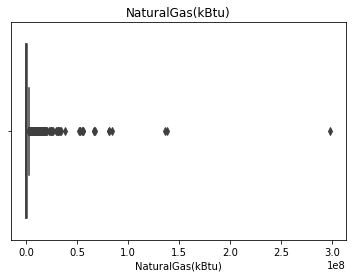

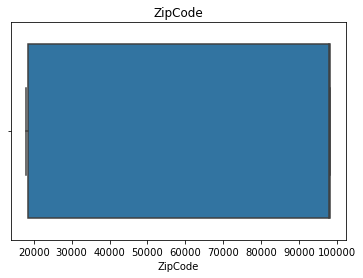

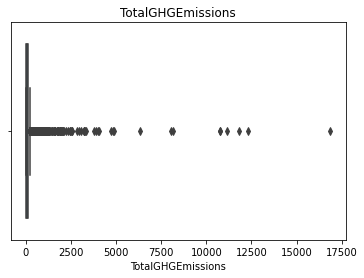

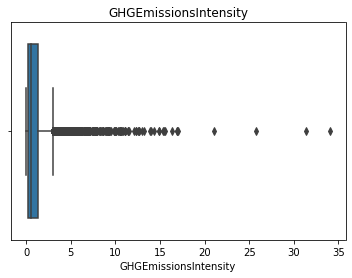

In [22]:
#Liste des variables numériques
var_num=list(data_concat.select_dtypes(include=['number']).columns)
for variable in var_num:
    sns.boxplot(data_concat[variable])
    plt.title(variable)
    plt.show()
    print('')

In [23]:
#Fonction qui supprime les valeurs aberrantes des variables qui sont au dessus de la borne sup et en dessous de la 
#borne inf

def val_ab(data,variable):
     #On calcule Q1 le premier quartile et Q3 le 3ème quartile
    q1=data[variable].quantile(q=0.25)
    q3=data[variable].quantile(q=0.75)
     #On calcule l'écart interquartile (IQR)
    IQR=q3-q1
    #Une valeur est considérée comme aberrante si l'écart avec Q1 ou Q3 est supérieure à plus de 1,5 fois l'IQR.
    #On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
    borne_inf = q1-1.5*IQR
    #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
    borne_sup = q3 +1.5*IQR
    #On garde les valeurs à l'intérieur de la borne inférieure et supérieure
    data[variable]=data[data[variable]<borne_sup][variable]
    data[variable]=data[data[variable]>borne_inf][variable]

In [24]:
#On exécute cette fonction pour toutes les variables dans liste
liste=['NumberofFloors', 'PropertyGFATotal','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','ENERGYSTARScore',
 'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
  'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity']
for variable in liste:
    val_ab(data_concat,variable)

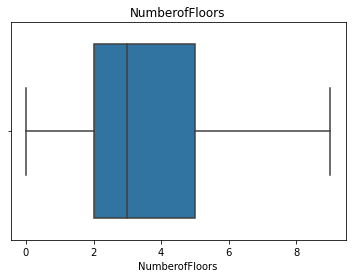

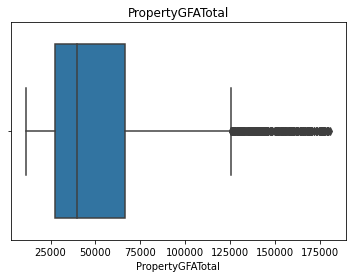

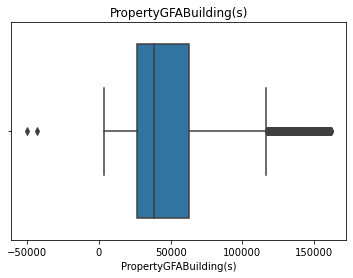

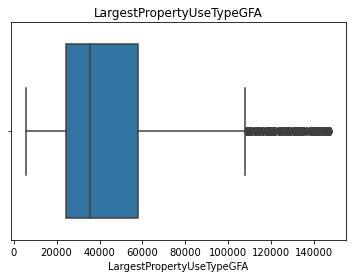

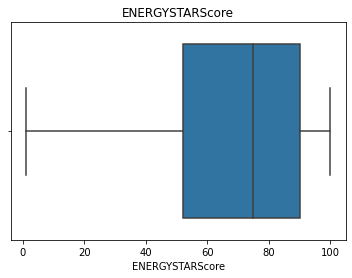

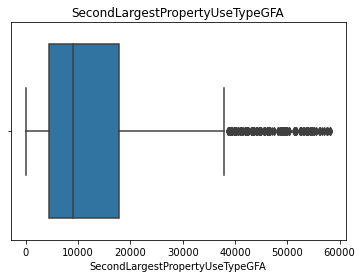

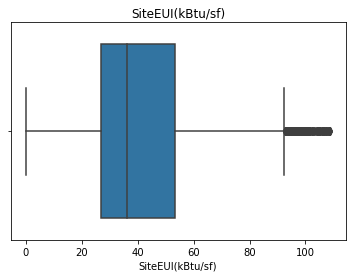

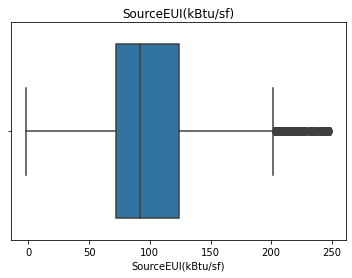

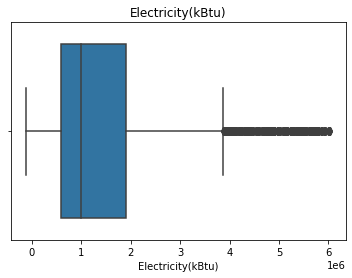

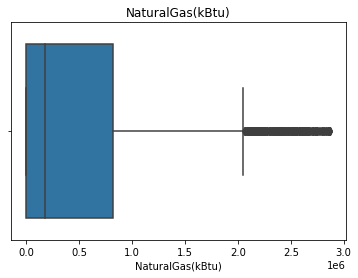

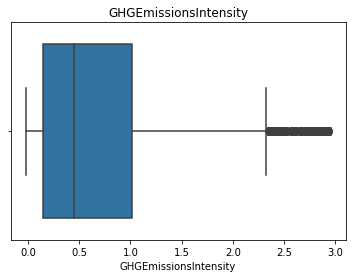

In [25]:
# voyons le graphe de nouveau
for variable in liste:
    sns.boxplot(data_concat[variable])
    plt.title(variable)
    plt.show()
    print('')

Nous allons regarder la colonne "Outlier". Elle nous renseigne sur le fait que la propriété est une valeur aberrante élevée
ou basse (O/N).</br>
Nous allons supprimé les valeurs aberrantes élevées de notre dataframe.

In [26]:
#Effectifs de la variable 'Outlier'
print(data_concat['Outlier'].value_counts())
print('Il y a', data_concat['Outlier'].value_counts().sum(),'outliers au total.')

High Outlier    46
Low Outlier     38
Low outlier     23
High outlier     9
Name: Outlier, dtype: int64
Il y a 116 outliers au total.


In [27]:
#Modifications des modalités
data_concat.loc[data_concat.Outlier=='High Outlier','Outlier']='High outlier'
data_concat.loc[data_concat.Outlier=='Low Outlier','Outlier']='Low outlier'

In [28]:
#Regardons si les modalités ont bien été regroupées
print(data_concat['Outlier'].value_counts())
print('Il y a', data_concat['Outlier'].value_counts().sum(),'outliers au total.')

Low outlier     61
High outlier    55
Name: Outlier, dtype: int64
Il y a 116 outliers au total.


In [29]:
#Suppression des "High outlier"
data_concat.drop (data_concat.loc[data_concat['Outlier'] == 'High outlier' ].index, inplace=True)

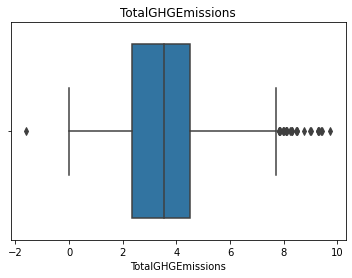

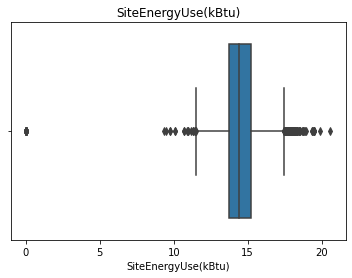

In [30]:
#On relance les boxplots pour nos 2 variables à prédire avec application du log encore
for variable in ['TotalGHGEmissions' ,'SiteEnergyUse(kBtu)']:
    sns.boxplot(data_concat[variable].apply(lambda x : np.log(1 + x)))
    plt.title(variable)
    plt.show()
    print('')

### <font color="blue" id="section_4_b">b. Traitement des valeurs manquantes</font>

Chacune des dataframes 2015 et 2016 contiennent un identifiant unique "OSEBuildingID", vérifions qu'il n'existe pas de doublons.
Et s'il en existe, supprimons les.

In [31]:
#Le code doit être unique dans la dataframe 2015
print(data2015.duplicated(subset='OSEBuildingID').sum())
#Le code doit être unique dans la dataframe 2016
print(data2016.duplicated(subset='OSEBuildingID').sum())

0
0


On remarque que les identifiants des batiments de 2015 sont repris dans la base de données de 2016. On assure ainsi un 
suivi de l'évolution de ces batiments par année.</br>
Etant donné le fait que nous voulons garder un identifiant unique pour chacun des batiments, nous allons prendre la 
valeur moyenne des données de 2015 et 2016.

In [32]:
#Recherchons la présence de doublons dans la dataframe
data_concat.duplicated().sum()

0

Recherchons le pourcentage de valeurs manquantes dans la dataframe final

In [33]:
#Voyons d'abord le nombre de lignes et de colonnes
data_concat.shape

(6661, 41)

In [34]:
# Nombre total de valeurs manquantes de data
val_manquantes = data_concat.isnull().sum().sum()
print(val_manquantes)
#Pourcentage de valeurs manquantes par rapport aux nombres de cellules de la dataframe
pourc_val_manquantes = val_manquantes/(len(data_concat)*len(data_concat.columns))*100
pourc_val_manquantes

45943


16.822713940996188

Il y a donc 16,82% de valeurs manquantes, ce qui est correct.

Visualisons les valeurs manquantes par variable à l'aide d'une heatmap.

<AxesSubplot:>

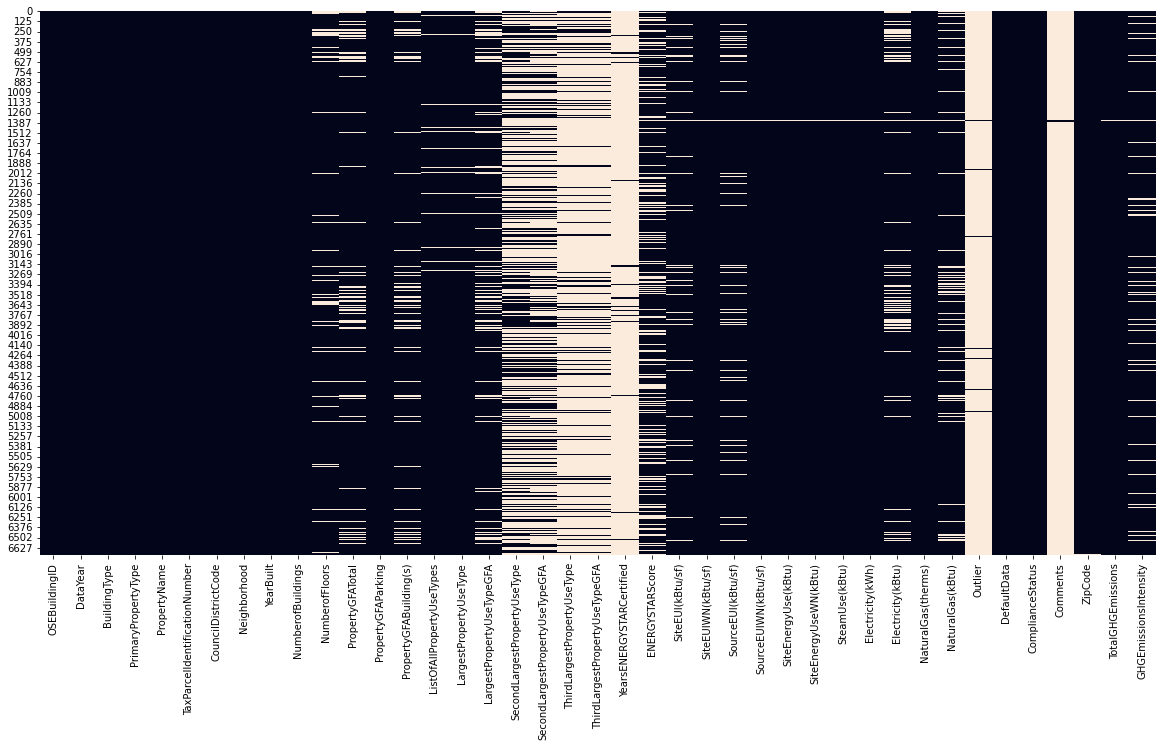

In [35]:
#on affiche une heatmap de seaborn pour visualiser les valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data_concat.isna(),cbar=False)

On voit qu'il n'y a pas de lignes complétement vides, et qu'il y a des colonnes à supprimer car quasi vides totalement.

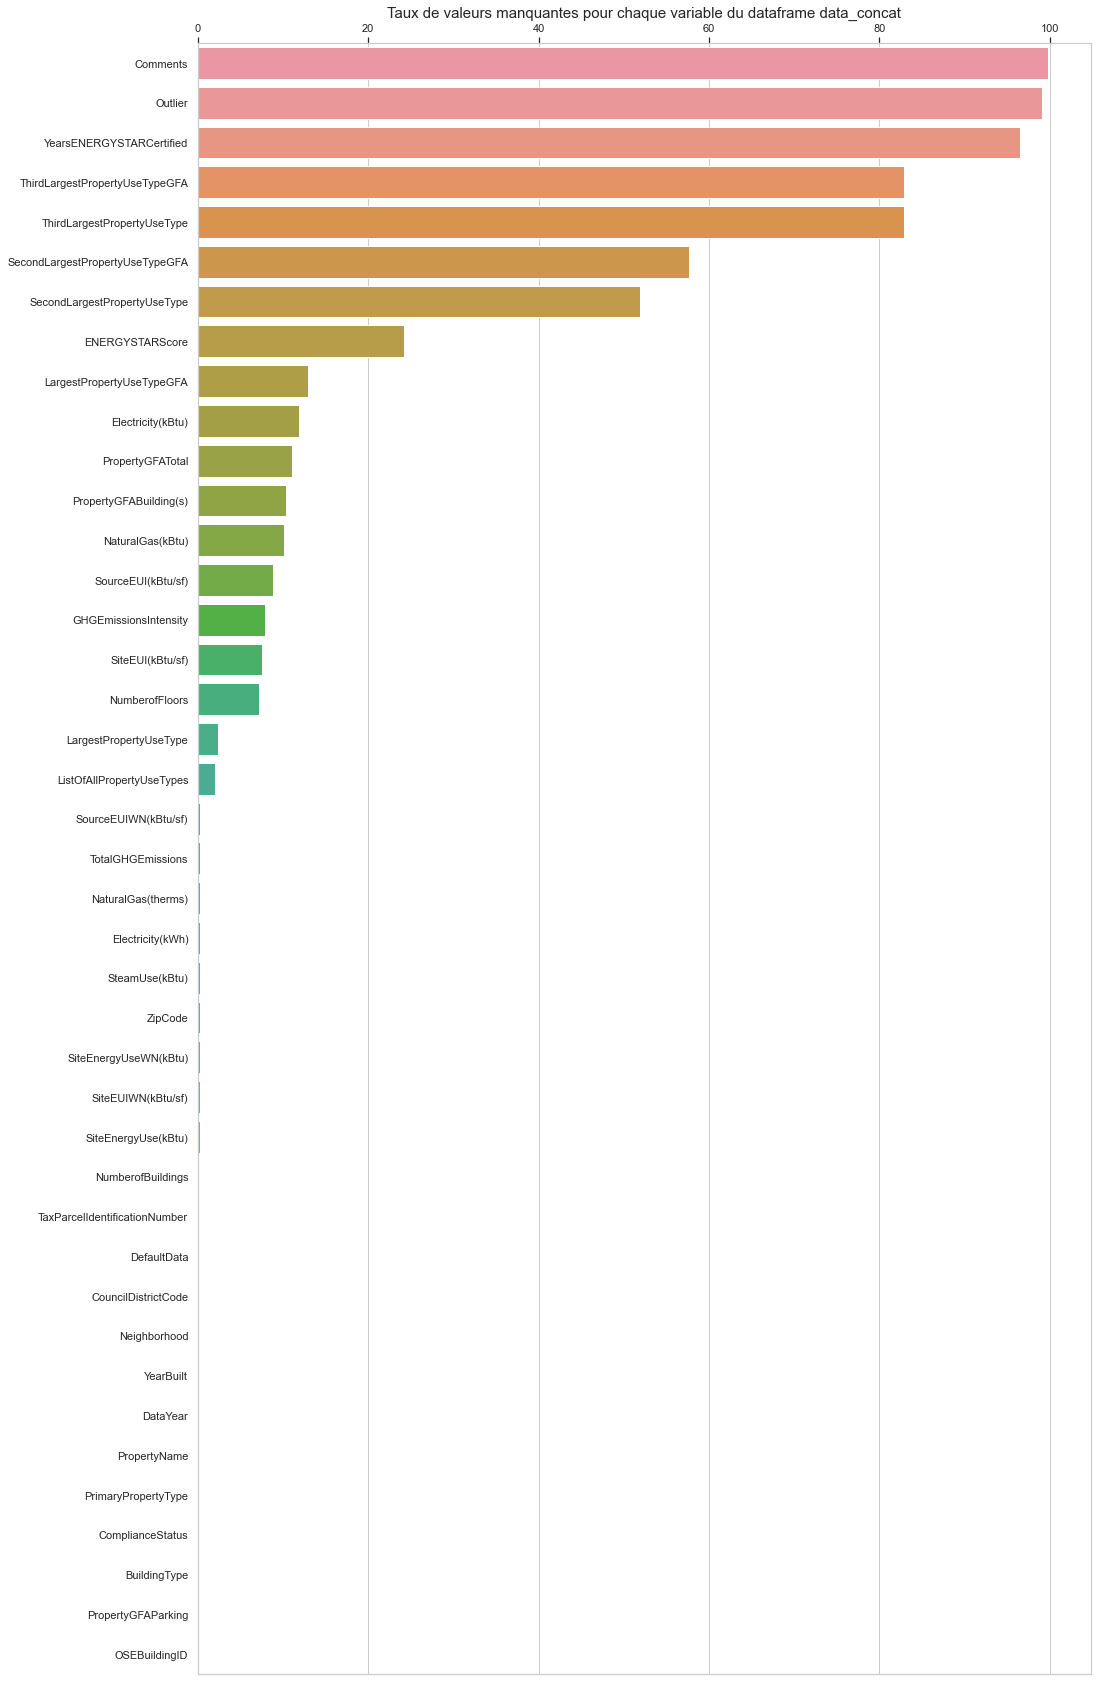

In [36]:
#calcul du pourcentage de donnés manquantes  

#taille utilisé pour le graphique
size = data_concat.shape
#valeurs manquantes pour chaque variable de la dataframe
nan_values = data_concat.isna().sum()
#calcul du pourcentage de données manquantes
nan_values = nan_values*100/size[0]
#On trie les pourcentages par ordre croissant
nan_values = nan_values.sort_values(ascending=False)
#on configure le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = nan_values.index, x=nan_values.values)
ax.xaxis.set_ticks_position('top')
plt.title('Taux de valeurs manquantes pour chaque variable du dataframe data_concat', size=15)
plt.show()

In [37]:
(data_concat.isna().sum()/data_concat.shape[0]).sort_values(ascending=True)

OSEBuildingID                      0.000000
ComplianceStatus                   0.000000
YearBuilt                          0.000000
Neighborhood                       0.000000
CouncilDistrictCode                0.000000
PropertyGFAParking                 0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
DefaultData                        0.000150
TaxParcelIdentificationNumber      0.000300
NumberofBuildings                  0.001201
SiteEnergyUse(kBtu)                0.002252
ZipCode                            0.002402
SiteEUIWN(kBtu/sf)                 0.002402
SiteEnergyUseWN(kBtu)              0.002402
TotalGHGEmissions                  0.002852
SteamUse(kBtu)                     0.002852
SourceEUIWN(kBtu/sf)               0.002852
NaturalGas(therms)                 0.002852
Electricity(kWh)                   0.002852
ListOfAllPropertyUseTypes       

In [38]:
#Nous allons donc garder que les variables à moins de 90% de valeurs manquantes.
data_concat=data_concat[data_concat.columns[data_concat.isna().sum()/data_concat.shape[0] < 0.9]]

In [39]:
 #Caculons une variable age du batiment à l'aide de "DataYear" et de "YearBuilt"
data_concat['AgeBuilt']=data_concat['DataYear'] - data_concat['YearBuilt']
liste=[ 'DefaultData', "ComplianceStatus", 'TaxParcelIdentificationNumber','Electricity(kWh)','DataYear','YearBuilt',
       'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','PropertyName','CouncilDistrictCode',
      'SiteEUIWN(kBtu/sf)','NaturalGas(therms)' ,'ZipCode' ]
data_concat=data_concat.drop(data_concat[liste], axis=1)

Nous allons traiter les nombreuses valeurs manquantes des variables 'SecondLargestPropertyUseType',
'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA'.
Cela concerne les secondes et troisièmes utilisation des bâtiments. S'il y a des valeurs manquantes, cela signifie que
les batiments n'ont pas de seconde ou troisième utilisation. Nous allons donc remplacer les valeurs manquantes par 
une nouvelle modalité "None" et par 0 quand il s'agit des surfaces.

In [40]:
data_concat['ThirdLargestPropertyUseType'] = data_concat['ThirdLargestPropertyUseType'].fillna("None")
data_concat['SecondLargestPropertyUseType'] = data_concat['SecondLargestPropertyUseType'].fillna("None")

In [41]:
#création d'une fonction qui remplace la valeur manquante par 0
def RemplValManqZero(data, variable):
    #On calcule la valeur nulle de la variable que l'on appelle "nulle"
    nulle = data[variable].fillna(0)
    #On remplace toutes les valeurs manquantes de la variable par la valeur de "nulle"
    data[variable].fillna(nulle, inplace=True)
    
RemplValManqZero(data_concat,'SecondLargestPropertyUseTypeGFA')
RemplValManqZero(data_concat,'ThirdLargestPropertyUseTypeGFA')

### <font color="blue" id="section_4_c">c. Sélection des variables à l'aide d'une heatmap</font>

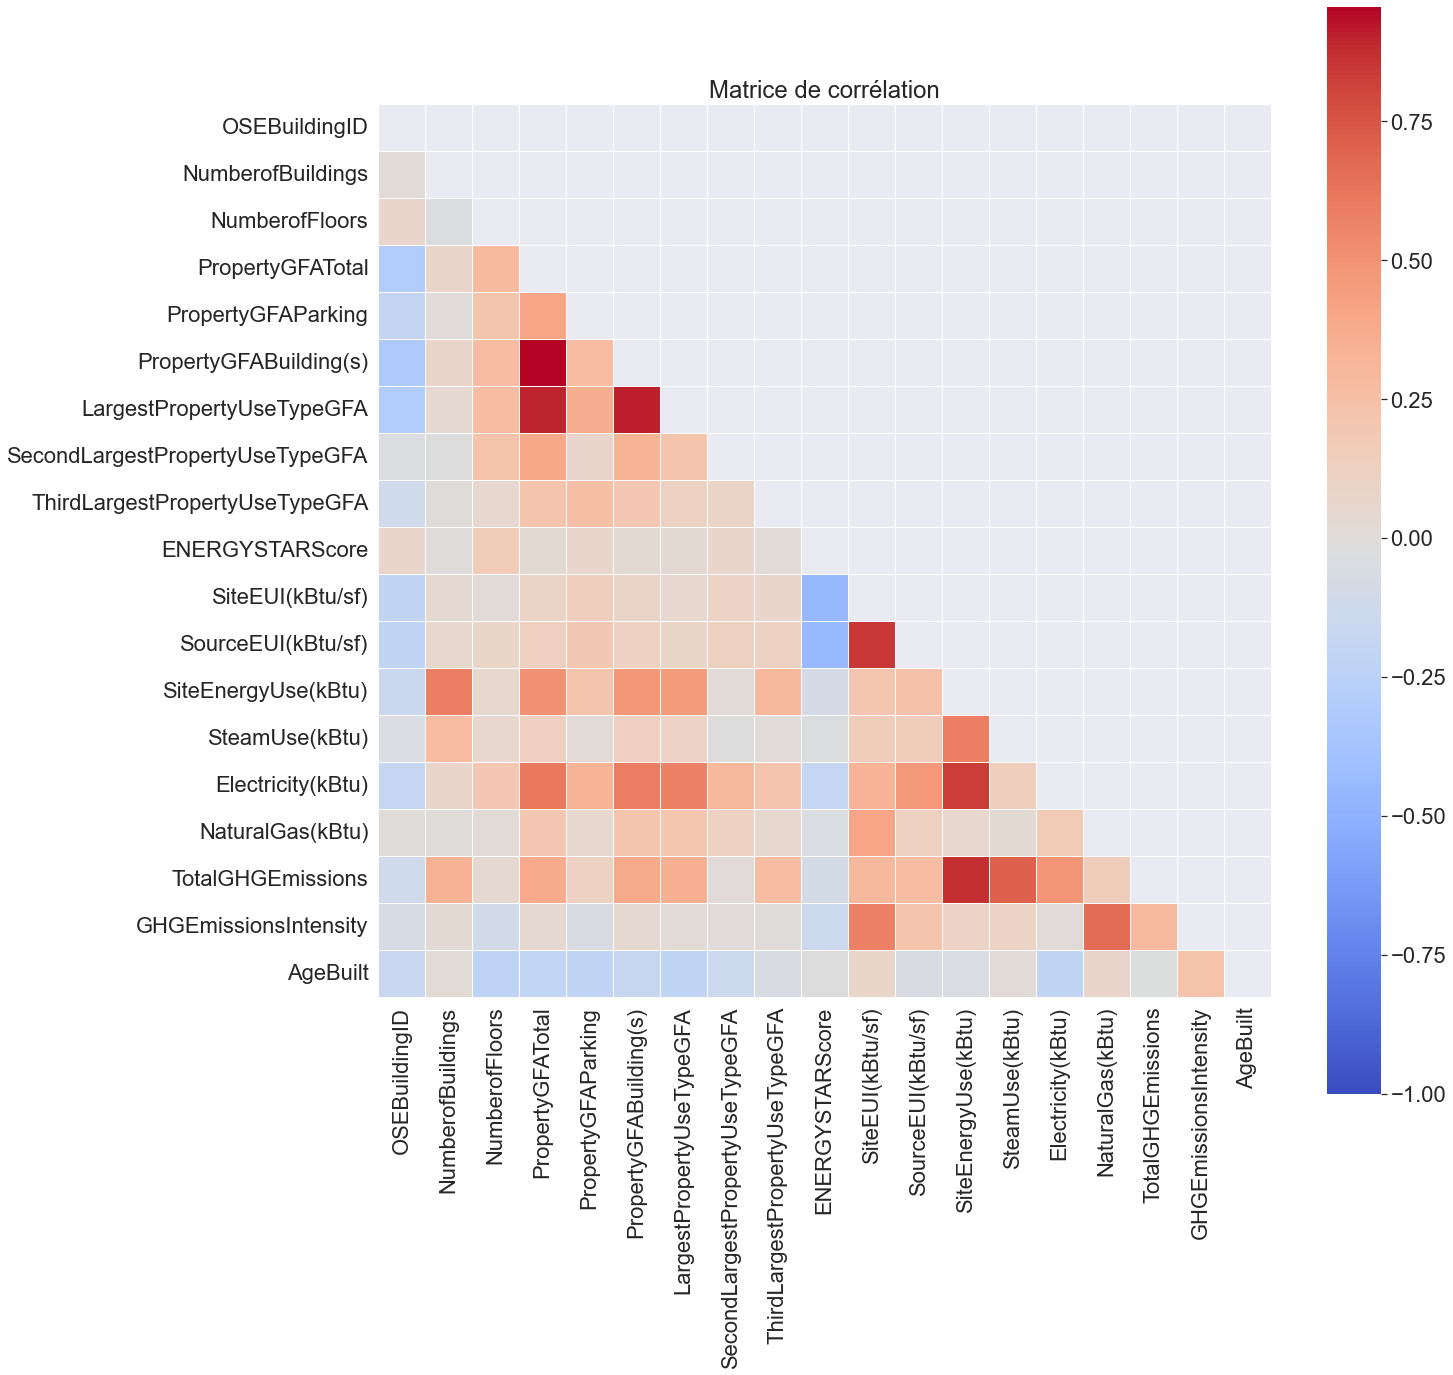

In [42]:
var_num=list(data_concat.select_dtypes(include=['number']).columns)

#matrice de corrélation des variables numériques
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
plt.title('Matrice de corrélation')

corr = data_concat[var_num].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#On utilise "heatmap", la carte thermique
ax = sns.heatmap(corr, mask=mask,square=True,vmin=-1,linewidths=0.5, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

On constate la présence de forte corrélation entre certaines variables :</br>
    - 'SiteEnergyUse(kBtu)'(la consommation totale d’énergie de bâtiments) et 'TotalGHGEmissions' (les émissions de CO2),</br>
    - 'SiteEnergyUse(kBtu)' et 'Electricity(kBtu)'(consommation d'électricité du batiment),</br>
    - 'SiteEUI(kBtu/sf)'(Intensité de conso d'énergie du site) et  'SourceEUI(kBtu/sf)'(Intensité de conso d'énergie à la source),</br>
    - 'PropertyGFABuilding(s)'(Espace au sol) et 'LargestPropertyUseTypeGFA'(surface de la plus grande utilisation du batiment),</br>
    - 'PropertyGFATotal'(surface du batiment + du stationnement) et 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',</br>
Nous n'allons pas garder les variables suivantes (par souci de redondance):</br>
'SourceEUI(kBtu/sf)','LargestPropertyUseTypeGFA' et 'PropertyGFATotal'.

Nous allons supprimer aussi la variable 'ListOfAllPropertyUseTypes' puisqu'elle se retrouve dans les variables 
'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'.

In [43]:
liste=['SourceEUI(kBtu/sf)','LargestPropertyUseTypeGFA','PropertyGFATotal','ListOfAllPropertyUseTypes']
data_concat.drop(data_concat[liste],axis=1, inplace=True)

In [44]:
data_concat.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'AgeBuilt'],
      dtype='object')

Par ailleurs, nous nous intéressons aux batiments non résidentiels. La variable "BuildingType" nous donne le type de 
résidences.
Regardons les modalités de cette variable.

In [45]:
data_concat['BuildingType'].value_counts()

NonResidential          2905
Multifamily LR (1-4)    2023
Multifamily MR (5-9)    1121
Multifamily HR (10+)     215
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

"Multifamily" LR, MR ou HR, concerne des résidences familiales.
Nous allons donc les retirer de notre dataframe.

In [46]:
data_concat.drop(data_concat.loc[data_concat['BuildingType'].str.contains('Multifamily')].index, inplace=True)

In [47]:
data_concat['BuildingType'].value_counts()

NonResidential        2905
SPS-District K-12      197
Nonresidential COS     153
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

On remarque par ailleurs la présence de variables qui diffèrent par leurs unités mais représentent 
le même type d'énergie. C'est le cas de : </br>
    - 'Electricity(kWh)' et 'Electricity(kBtu)'</br>
    - 'NaturalGas(therms)' et 'NaturalGas(kBtu)'</br>
Etant donné qu'il y a beaucoup de variables qui utilisent l'unité (kBtu), nous allons garder les variables (kBtu)  et 
supprimer les autres, pour conserver les mêmes unités.</br>
</br>
D'autre part, nous avons des variables en double, dont l'une avec WN comme suffixe. WN correspond aux conditions 
météorologiques normalisées.</br>
Nous n'avons pas besoin de ces renseignements pour nos modélisations. Nous allons donc ne pas prendre en compte ses 
variables.</br>
Nous allons retirer de notre analyse les variables "DefautData" et "ComplianceStatus" également, ainsi que 
'TaxParcelIdentificationNumber'.


In [48]:
data_concat.describe(include="all")

OSEBuildingID    BuildingType          PrimaryPropertyType  \
count     3302.000000            3302                         3302   
unique            NaN               5                           30   
top               NaN  NonResidential  Small- and Mid-Sized Office   
freq              NaN            2905                          584   
mean     15979.068141             NaN                          NaN   
std      13403.415502             NaN                          NaN   
min          1.000000             NaN                          NaN   
25%        579.000000             NaN                          NaN   
50%      21127.000000             NaN                          NaN   
75%      24562.250000             NaN                          NaN   
max      50226.000000             NaN                          NaN   

       Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count          3302        3300.000000     3040.000000         3302.000000   
unique           19                NaN             NaN                 NaN   
top        DOWNTOWN                NaN             NaN                 NaN   
freq            725                NaN             NaN                 NaN   
mean            NaN           1.117879        2.702632        13275.680800   
std             NaN           2.225207        1.782993        43676.195044   
min             NaN           0.000000        0.000000           -2.000000   
25%             NaN           1.000000        1.000000            0.000000   
50%             NaN           1.000000        2.000000            0.000000   
75%             NaN           1.000000        4.000000            0.000000   
max             NaN         111.000000        9.000000       512608.000000   

        PropertyGFABuilding(s) LargestPropertyUseType  \
count              2865.000000                   3231   
unique                     NaN                     57   
top                        NaN                 Office   
freq                       NaN                    962   
mean              52553.744503                    NaN   
std               33693.741139                    NaN   
min              -50550.000000                    NaN   
25%               26830.000000                    NaN   
50%               40768.000000                    NaN   
75%               66497.000000                    NaN   
max              161678.000000                    NaN   

       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
count                          3302                      3302.000000   
unique                           48                              NaN   
top                            None                              NaN   
freq                           1646                              NaN   
mean                            NaN                      5512.825712   
std                             NaN                     10429.195797   
min                             NaN                         0.000000   
25%                             NaN                         0.000000   
50%                             NaN                         0.000000   
75%                             NaN                      7500.000000   
max                             NaN                     58218.000000   

       ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
count                         3302                     3302.000000   
unique                          41                             NaN   
top                           None                             NaN   
freq                          2623                             NaN   
mean                           NaN                     2893.967716   
std                            NaN                    15942.887397   
min                            NaN                        0.000000   
25%                            NaN                        0.000000   
50%                            NaN                

### <font color="blue" id="section_4_d">d. Traitement des valeurs négatives</font>

Nous constatons la présence de valeurs négatives pour des variables qui doivent être positives. </br>
Nous allons remplacer ces valeurs par leurs médianes, pour nos variables non prédictives.
Pour ce qui est des variables prédictives, nous allons supprimer les valeurs inférieurs à 0.

In [49]:
#On remplace les valeurs négatives par la médiane
liste=['PropertyGFAParking','PropertyGFABuilding(s)','Electricity(kBtu)','GHGEmissionsIntensity']
#création d'une fonction qui remplace la valeur manquante par la médiane
def RemplValManqMedian(variable):
    #On calcule la médiane de la variable que l'on appelle "median"
    mediane = data_concat[variable].median()
    #On remplace toutes les valeurs manquantes de la variable par la valeur de "median"
    data_concat.loc[data_concat[variable]<0,variable]=mediane

for variable in liste:
    RemplValManqMedian(variable)

In [50]:
# On ne garde que les bâtiments avec consommation / emission > 0
data_concat = data_concat[data_concat["SiteEnergyUse(kBtu)"]>0]
data_concat = data_concat[data_concat["TotalGHGEmissions"]>0]
data_concat.dropna(subset=['TotalGHGEmissions','SiteEnergyUse(kBtu)'] , axis=0 , inplace=True)

### <font color="blue" id="section_4_e">e. Choix final des variables</font>

Nous avons pour consigne de ne conserver que les données déclaratives du permis d'exploitation commerciale 
(taille et usage des bâtiments, mention de travaux récents, date de construction..)pour notre prédiction.</br>
Nous devons donc enlever de notre dataframe les variables qui concernent:</br>
- la consommation électrique 'Electricity(kBtu)',</br>
- la consommation de gaz 'NaturalGas(kBtu)',</br>
- l'emission de gaz à effet de serre 'GHGEmissionsIntensity',</br>
- la consommation d'énergie du site 'SiteEUI(kBtu/sf)',</br>
</br>
L’objectif étant de se passer des relevés de consommation annuels
(attention à la fuite de données), mais rien ne nous interdit d’en déduire
des variables plus simples (nature et proportions des sources d’énergie utilisées). 

In [51]:
var_a_supp=[ 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity','SiteEUI(kBtu/sf)','OSEBuildingID']
data_concat=data_concat.drop(data_concat[var_a_supp], axis=1)

In [52]:
data_concat.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'TotalGHGEmissions', 'AgeBuilt'],
      dtype='object')

In [53]:
data_concat.isnull().sum()

BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                      261
PropertyGFAParking                    0
PropertyGFABuilding(s)              435
LargestPropertyUseType               69
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                    1077
SiteEnergyUse(kBtu)                   0
SteamUse(kBtu)                        0
TotalGHGEmissions                     0
AgeBuilt                              0
dtype: int64

In [54]:
#Nombre de lignes et de colonnes de la dataframe "data_clean"
data_concat.shape

(3273, 17)

# <font color="#8333ff">     Partie 2: Analyse des données

## <font color="blue">Sommaire</font>

1. [Analyses univariés](#section_I) </br>
    a.[Variables numériques](#section_I_a)</br>
    b.[Variables catégorielles](#section_I_b)</br>
2. [Analyses bivariés](#section_II) </br>
    a.[Graphique des variables à prédire vs d'autres variables](#section_II_a)</br>
    b.[Analyses des relations entre les variables numériques](#section_II_b)</br>


## <font color="red" id="section_I">1. Analyses univariés</font>

Regardons d'abord les statistiques des variables de notre dataframe.

In [55]:
#Statistiques descriptives des variables de notre dataframe "data_clean"
data_concat.describe(include="all")

BuildingType          PrimaryPropertyType Neighborhood  \
count             3273                         3273         3273   
unique               5                           30           19   
top     NonResidential  Small- and Mid-Sized Office     DOWNTOWN   
freq              2896                          582          721   
mean               NaN                          NaN          NaN   
std                NaN                          NaN          NaN   
min                NaN                          NaN          NaN   
25%                NaN                          NaN          NaN   
50%                NaN                          NaN          NaN   
75%                NaN                          NaN          NaN   
max                NaN                          NaN          NaN   

        NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count         3273.000000     3012.000000          3273.00000   
unique                NaN             NaN                 NaN   
top                   NaN             NaN                 NaN   
freq                  NaN             NaN                 NaN   
mean             1.118851        2.708499         13389.23923   
std              2.234343        1.785404         43851.98058   
min              0.000000        0.000000             0.00000   
25%              1.000000        1.000000             0.00000   
50%              1.000000        2.000000             0.00000   
75%              1.000000        4.000000             0.00000   
max            111.000000        9.000000        512608.00000   

        PropertyGFABuilding(s) LargestPropertyUseType  \
count              2838.000000                   3204   
unique                     NaN                     57   
top                        NaN                 Office   
freq                       NaN                    960   
mean              52511.430233                    NaN   
std               33565.300279                    NaN   
min                3636.000000                    NaN   
25%               26672.500000                    NaN   
50%               40662.000000                    NaN   
75%               66493.750000                    NaN   
max              161678.000000                    NaN   

       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
count                          3273                      3273.000000   
unique                           48                              NaN   
top                            None                              NaN   
freq                           1622                              NaN   
mean                            NaN                      5545.088756   
std                             NaN                     10460.339380   
min                             NaN                         0.000000   
25%                             NaN                         0.000000   
50%                             NaN                         0.000000   
75%                             NaN                      7505.000000   
max                             NaN                     58218.000000   

       ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
count                         3273                     3273.000000   
unique                          41                             NaN   
top                           None                             NaN   
freq                          2597                             NaN   
mean                           NaN                     2913.031591   
std                            NaN                    16010.668641   
min                            NaN                        0.000000   
25%                            NaN                        0.000000   
50%                            NaN                        0.000000   
75%                            NaN                        0.000000   
max                            NaN                   459748.000000   

        ENERGYSTARSco

In [56]:
data_concat.dtypes.value_counts()

float64    9
object     6
int64      2
dtype: int64

Nous avons donc 18 variables numériques et 7 variables catégorielles.

### <font color="blue" id="section_I_a">a. Variables numériques</font>

Regardons la distribution des variables numériques.

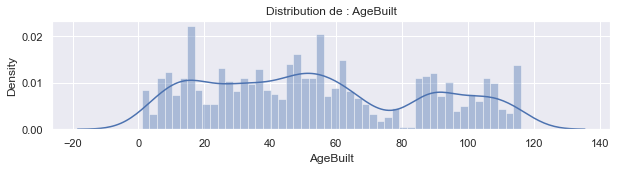

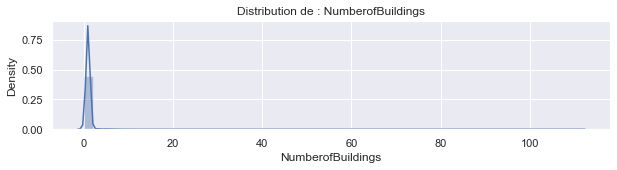

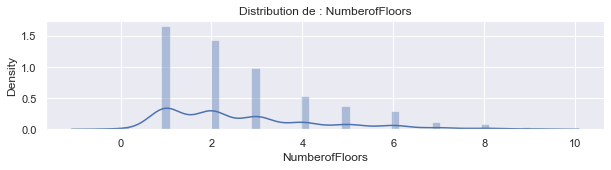

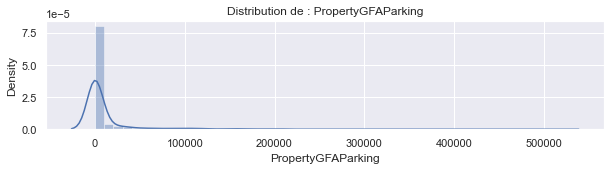

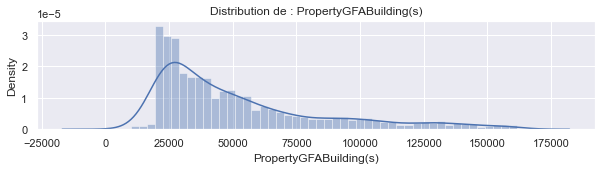

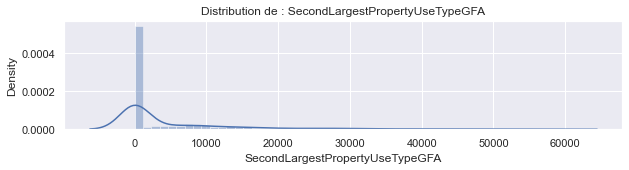

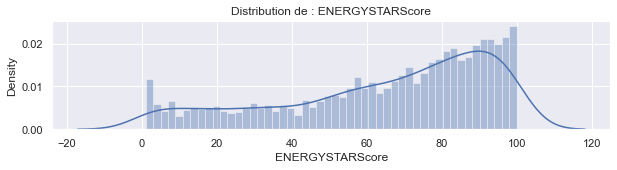

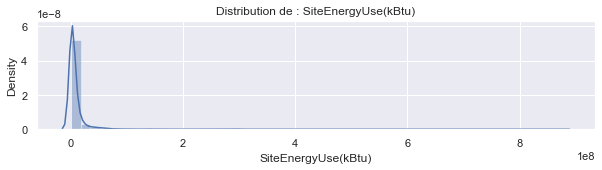

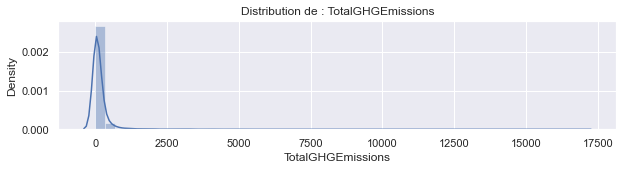

In [57]:
#graphique pour chacune des variables numériques
var_num=[ 'AgeBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions']
for variable in var_num :
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data_concat[variable], bins=50) 
    titre = 'Distribution de : ' + variable
    plt.title(titre) 
    plt.show()
    print('')

Il y a des variables asymétriques : "NaturalGas(kBtu)","SteamUse(kBtu)","PropertyGFAParking", par exemple.

On remarque les 2 variables cibles à prédire 'TotalGHGEmissions' qui concerne les émissions totales de CO2 et 
'SiteEnergyUse(kBtu)' pour  la consommation totale d’énergie de bâtiments, sont asymétriques, d'après la distribution de 
ces variables.

Nous allons modifier cela en appliquant le log à nos variables. Cela changerait
la nature de la distribution qui se rapprocherait de la distribution normale.</br>
La transformation logarithmique consiste tout simplement à appliquer la fonction log à chacune des valeurs de la
variable à transformer. Vous utilisez ensuite dans votre analyse la nouvelle variable constituée des résultats de
la fonction log au lieu des données originales. Cette transformation a un impact marqué sur la distribution d'une 
variable. Elle permet en général de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins
étendus. 

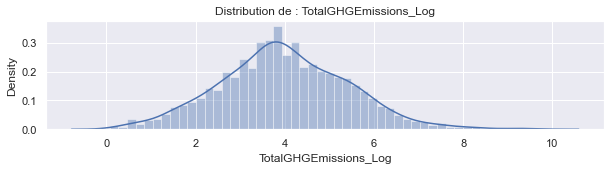

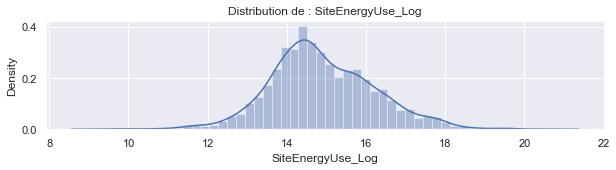

In [58]:
#On applique le logarithme à nos variables et on relance les histogrammes
# Log pour normaliser
data_concat['SiteEnergyUse_Log']=np.log1p(data_concat['SiteEnergyUse(kBtu)'])
data_concat['TotalGHGEmissions_Log']=np.log1p(data_concat['TotalGHGEmissions'])
#Histogrammes
for variable in ['TotalGHGEmissions_Log' ,'SiteEnergyUse_Log']:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data_concat[variable], bins=50) 
    titre = 'Distribution de : ' + variable
    plt.title(titre) 
    plt.show()
    print('')

Il y a des variables discrètes dans notre liste de variables. Nous allons nous concentrer sur les variables continues.

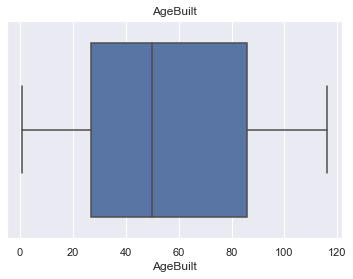

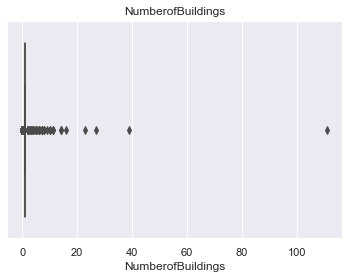

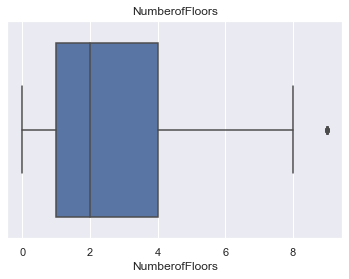

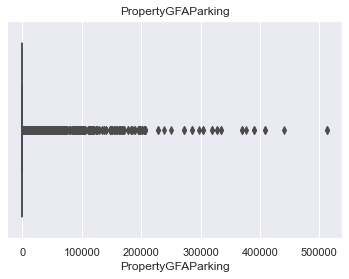

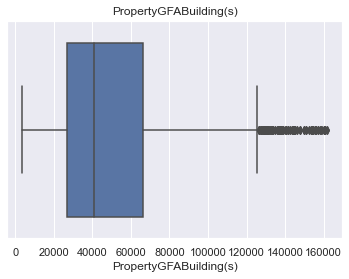

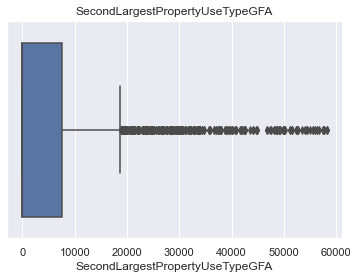

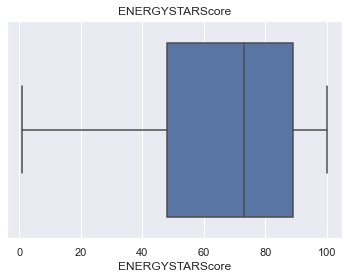

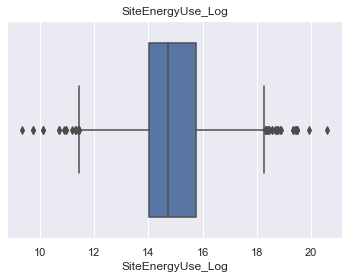

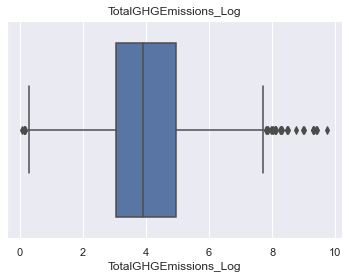

In [59]:
## voyons les boites à moustache de ces variables
var_num=[ 'AgeBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse_Log',
 'TotalGHGEmissions_Log']
for variable in var_num:
    sns.boxplot(data_concat[variable])
    plt.title(variable)
    plt.show()
    print('')
#on ajuste la taille
sns.set(font_scale=1)

**'PropertyGFABuilding(s)'**La surface des batiments a une médiane d'environs 40000 pieds carrés.</br>
</br>
** 'SecondLargestPropertyUseTypeGFA'** : Les 3/4 des batiments ont une surface de la 2ème plus grande utilisation de leur propriété qui se situe entre 0 et 19000
pieds carrés environs.</br>
</br>
**'NumberofFloors'** : Nous avons des batiments qui vont entre 0 et 8 étages maximum. La moitié possède entre 0 et 2 étages. </br>
</br>
**'ENERGYSTARScore'** : L'ENERGYSTARScore, qui représente la performance énergétique globale d'une propriété, a une valeur médianne de 73. Ce qui 
est un bon score. L'écart interquartile se situe entre 50 et 90 environs.</br>
Un score de 50 représente une performance énergétique médiane, tandis qu'un score de 75 ou plus indique que votre bâtiment est l'un des plus
performants et peut être éligible à la certification ENERGY STAR.</br>
</br>
**'SiteEUI(kBtu/sf)'** : L'intensité de consommation d'énergie du site (IUE)est comprise entre 0 et 154 kBtu/sf.</br>
</br>
**'SteamUser(kBtu)'** : La quantité de vapeur consommée par la propriété est faible. En majorité, entre 0 er 0.2 kBtu.</br>
</br>


### <font color="blue" id="section_I_b">b. Variables catégorielles</font>

In [60]:
#Selection de nos variables catégorielles
var_categ=list(data_concat.select_dtypes(include=['object']).columns)

In [61]:
for variable in var_categ:
    print(f'{variable:-<50}{data_concat[variable].unique()}')

BuildingType--------------------------------------['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
PrimaryPropertyType-------------------------------['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'College/University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility\n'
 'Distribution Center' 'Large Office' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supermarket/Grocery Store' 'Laboratory'
 'Self-Storage Facility' 'Refrigerated Warehouse' 'Restaurant\n'
 'Low-Rise Multifamily' 'Restaurant' 'University' 'Warehouse'
 'Residence Hall' 'Supermarket / Grocery Store' 'Office']
Neighborhood--------------------------------------['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'No

Nous allons compter le nombre de modalités par variable.

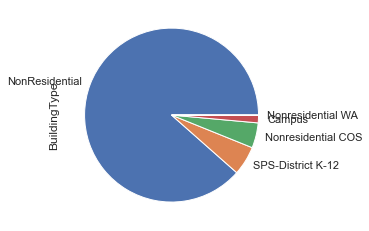

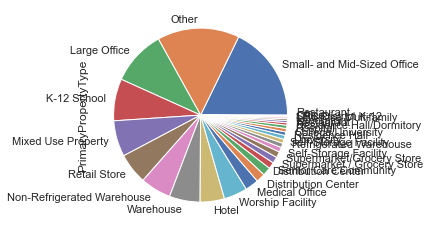

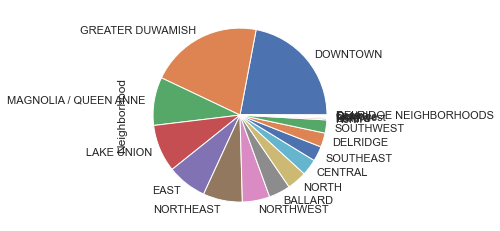

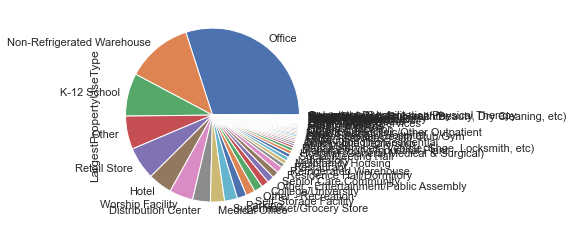

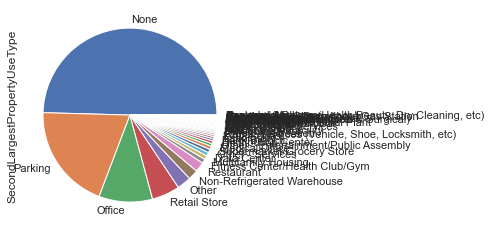

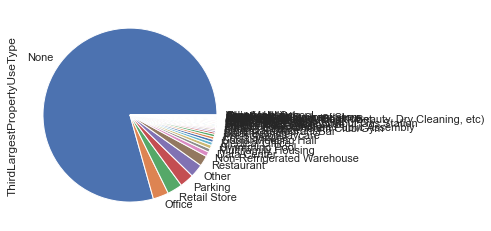

In [62]:
for variable in var_categ:
    plt.figure()
    data_concat[variable].value_counts().plot.pie()

**Nuage de mots**

In [63]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [64]:
from wordcloud import WordCloud

#fonction qui récupère les mots les plus utilisés parmis le nombre_max donné
def top_mot(data, variable, nombre_max):
  comptage_mot_cle = dict()
  for index, var in data[variable].iteritems():
    if isinstance(var, float):
      continue
    for mot in var.split(','):
      if mot in comptage_mot_cle.keys():
        comptage_mot_cle[mot] += 1
      else :
        comptage_mot_cle[mot] = 1
  
  mot_top = []
  for i,j in comptage_mot_cle.items():
    mot_top.append([i,j])
  mot_top.sort(key = lambda x:x[1], reverse = True)

  return mot_top[:nombre_max]

#fonction qui trace un nuage de mots
def nuage_de_mots(data,variable,nombre_max):
  fig = plt.figure(1, figsize=(15,15))
  ax1 = fig.add_subplot(1,1,1)
  mot = dict()
  mot_top = top_mot(data_concat, variable, nombre_max)
  for i in mot_top:
    mot[i[0]] = i[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(mot)

  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nombre_max, variable), fontsize=22)
  plt.show()



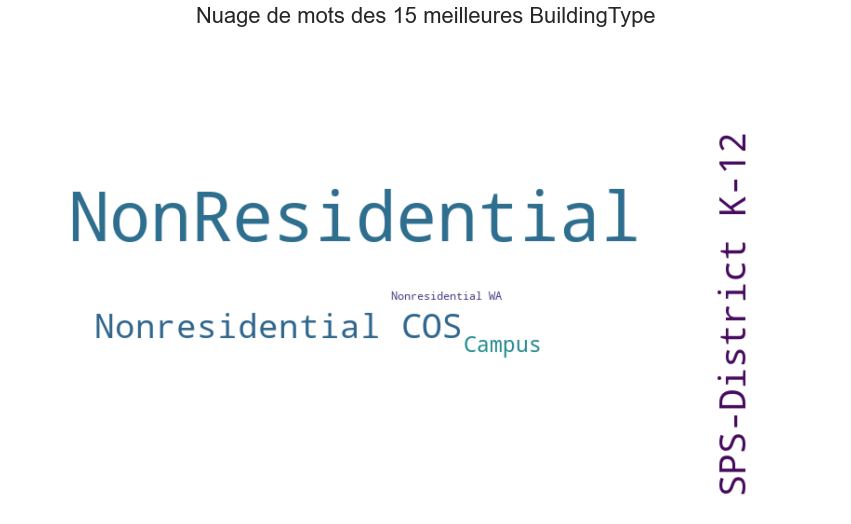

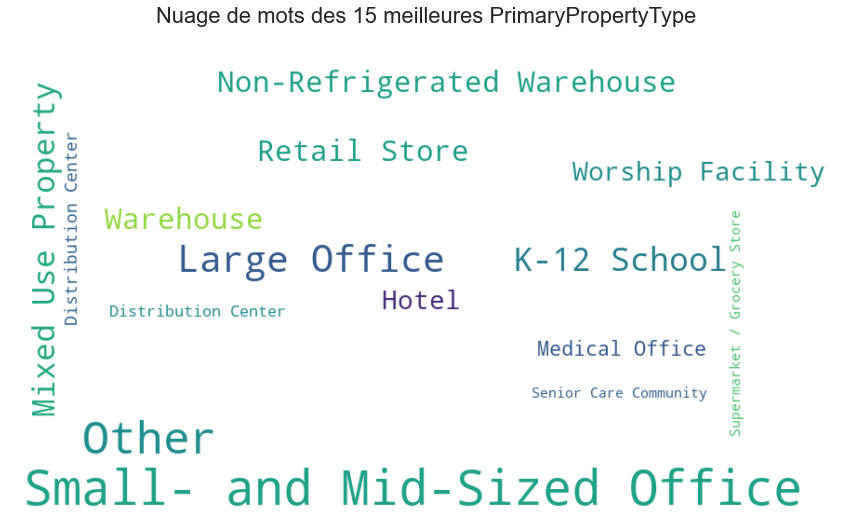

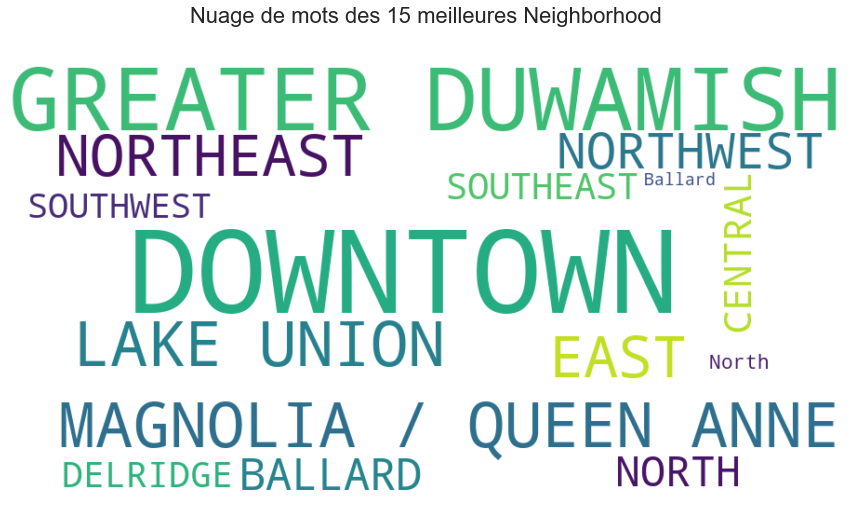

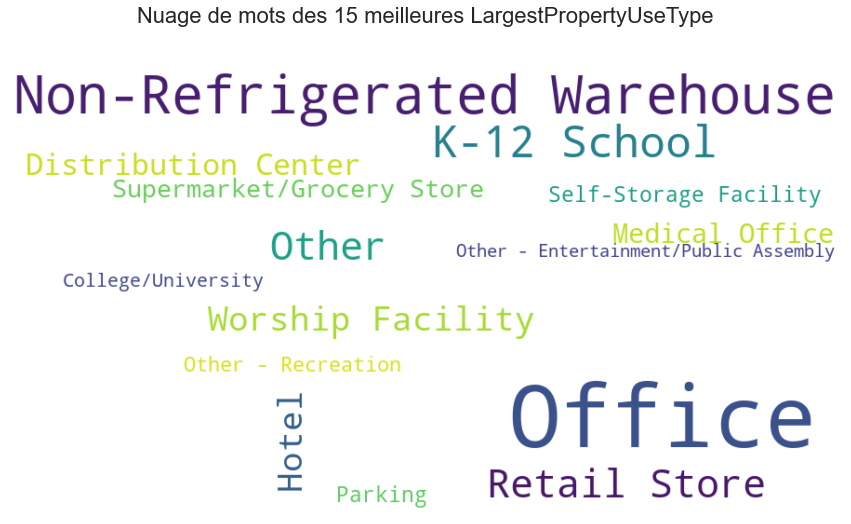

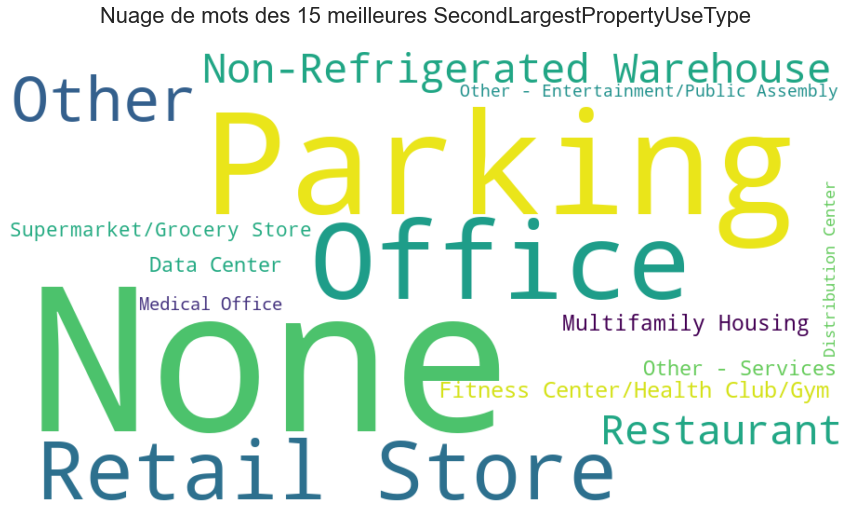

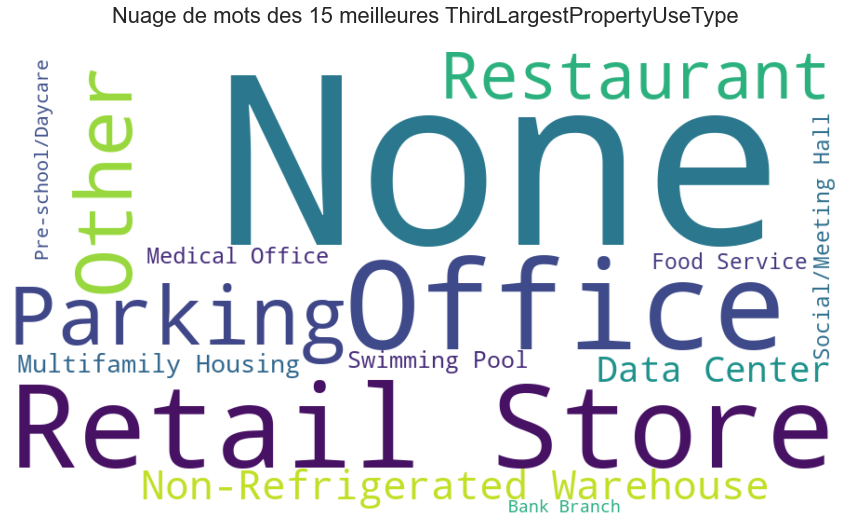

In [65]:
for variable in var_categ: 
    nuage_de_mots(data_concat,variable,15) 

**Diagramme à barres**

In [66]:
data_concat['BuildingType'].value_counts()

NonResidential        2896
SPS-District K-12      177
Nonresidential COS     153
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

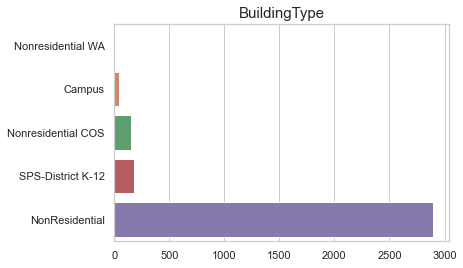

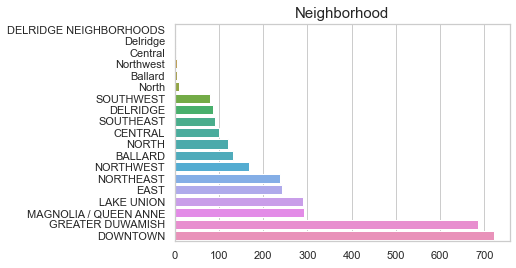

In [67]:
for variable in ['BuildingType','Neighborhood']:
    #définit l’arrière-plan du tracé qui sera blanc
    sns.set(style="whitegrid") 
    #taille de la figure
    #plt.figure(figsize=(20, 20))
    plt.title(variable, size=15)
    #Tracé d'un diagramme à barres
    plot = sns.barplot(x = data_concat[variable].value_counts().sort_values().values, 
                       y = data_concat[variable].value_counts().sort_values().index)
    plt.show()
    

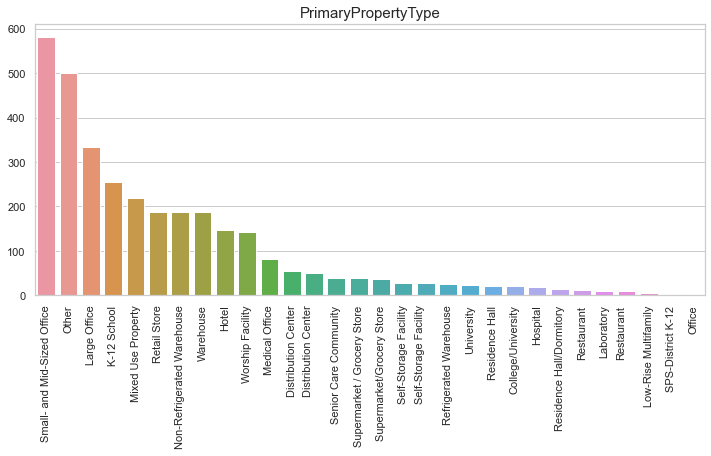

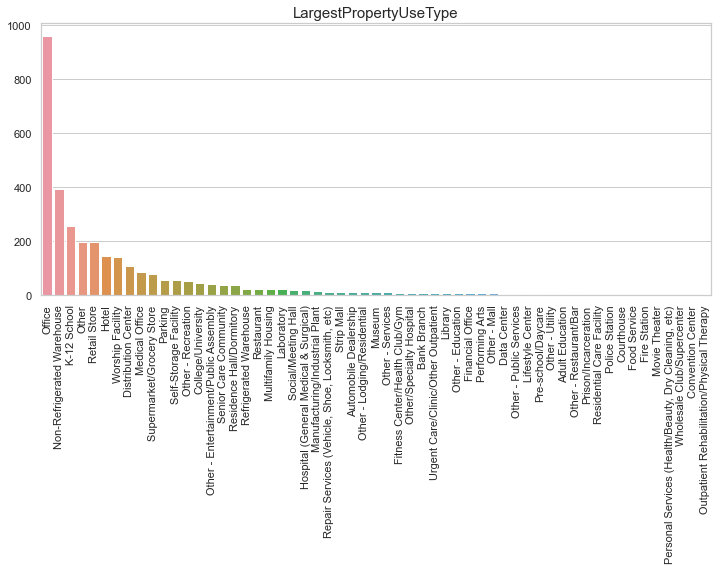

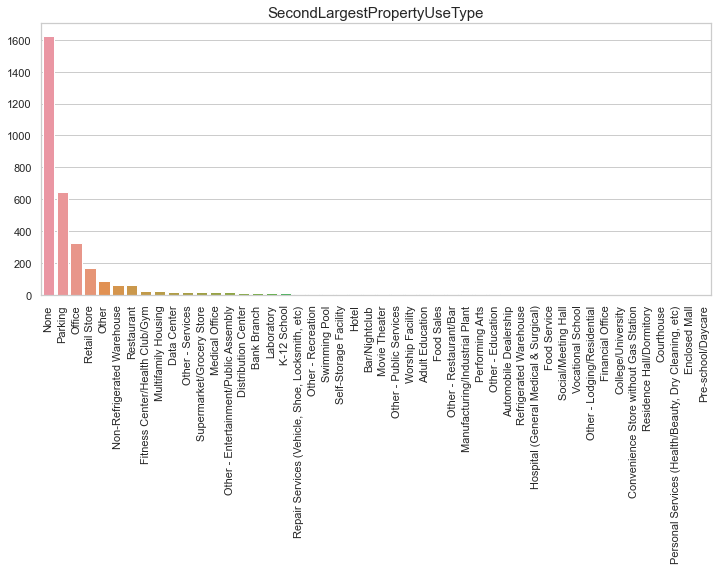

In [68]:
for variable in ['PrimaryPropertyType','LargestPropertyUseType', 'SecondLargestPropertyUseType']:
    fig = plt.figure(1, figsize=(12, 5))
    Nombre = data_concat[variable].value_counts()
    sns.barplot(x=Nombre.index, y = Nombre.values)
    plt.xticks(rotation=90)
    plt.title(variable, size=15)
    plt.show()

**Diagramme en secteurs**

In [69]:
#Affiche le pourcentage pour chacune des modalités du type de bâtiment
data_concat['BuildingType'].value_counts(normalize=True).round(2)

NonResidential        0.88
SPS-District K-12     0.05
Nonresidential COS    0.05
Campus                0.01
Nonresidential WA     0.00
Name: BuildingType, dtype: float64

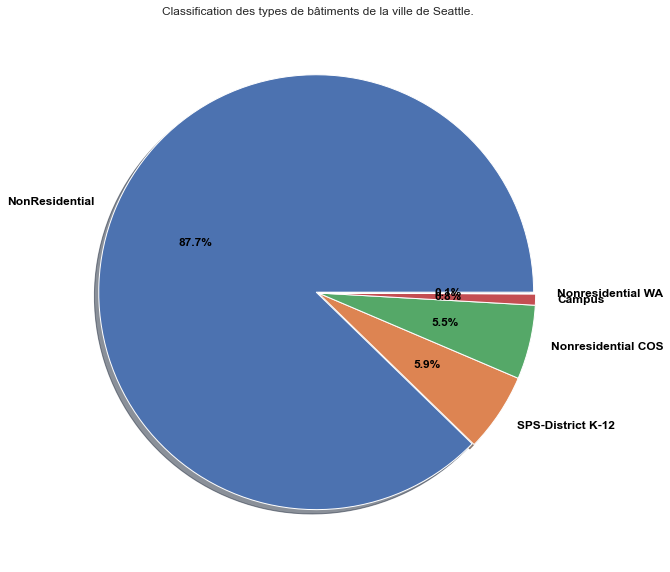

In [70]:
building = data_concat.groupby(by='BuildingType')['PropertyGFABuilding(s)'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .01

plt.pie(building, labels=building.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Classification des types de bâtiments de la ville de Seattle.")
plt.show()

## <font color="red" id="section_II">2. Analyses bivariés</font>

### <font color="blue" id="section_II_a">a. Graphique des variables à prédire vs d'autres variables</font>

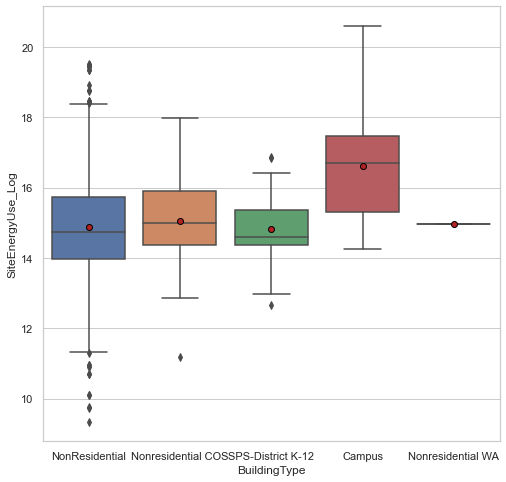

In [71]:
#Box plot affichant le type de batiment en abscisse et la consommation totale d'énergie en ordonnée
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black',
'markerfacecolor':'firebrick'}
sns.boxplot('BuildingType',data_concat['SiteEnergyUse_Log'],data=data_concat, showmeans=True, meanprops=meanprops)
plt.show()

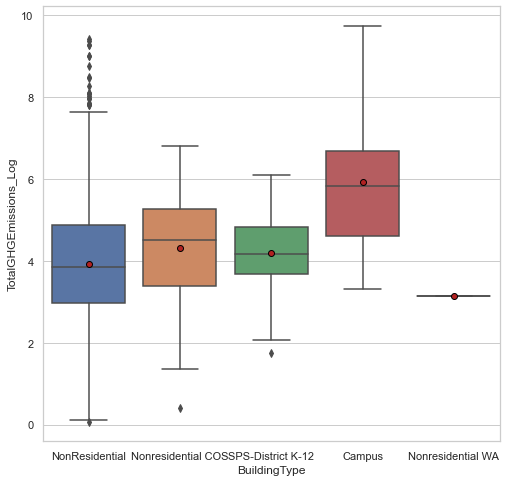

In [72]:
#Box plot affichant le type de batiment en abscisse et les émissions de CO2 en ordonnée
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black',
'markerfacecolor':'firebrick'}
sns.boxplot('BuildingType',data_concat['TotalGHGEmissions_Log'],data=data_concat, showmeans=True, meanprops=meanprops)
plt.show()


In [73]:
pd.crosstab(data_concat['BuildingType'],data_concat["PrimaryPropertyType"])

PrimaryPropertyType  College/University  Distribution Center  \
BuildingType                                                   
Campus                                5                    0   
NonResidential                       16                   53   
Nonresidential COS                    0                    2   
Nonresidential WA                     0                    0   
SPS-District K-12                     0                    0   

PrimaryPropertyType  Distribution Center\n  Hospital  Hotel  K-12 School  \
BuildingType                                                               
Campus                                   0         0      0            8   
NonResidential                          49        20    148           78   
Nonresidential COS                       2         0      0            0   
Nonresidential WA                        0         0      0            0   
SPS-District K-12                        0         0      0          169   

PrimaryPropertyType  Laboratory  Large Office  Low-Rise Multifamily  \
BuildingType                                                          
Campus                        0             2                     2   
NonResidential               11           325                     3   
Nonresidential COS            0             7                     0   
Nonresidential WA             0             0                     0   
SPS-District K-12             0             0                     0   

PrimaryPropertyType  Medical Office  Mixed Use Property  \
BuildingType                                              
Campus                            0                   7   
NonResidential                   80                 200   
Nonresidential COS                2                  12   
Nonresidential WA                 0                   0   
SPS-District K-12                 0                   0   

PrimaryPropertyType  Non-Refrigerated Warehouse  Office  Other  \
BuildingType                                                     
Campus                                        0       0     14   
NonResidential                              181       0    378   
Nonresidential COS                            6       3    104   
Nonresidential WA                             0       0      0   
SPS-District K-12                             0       0      4   

PrimaryPropertyType  Refrigerated Warehouse  Residence Hall  \
BuildingType                                                  
Campus                                    0               0   
NonResidential                           25              21   
Nonresidential COS                        0               0   
Nonresidential WA                         0               0   
SPS-District K-12                         0               0   

PrimaryPropertyType  Residence Hall/Dormitory  Restaurant  Restaurant\n  \
BuildingType                                                              
Campus                                      0           1             1   
NonResidential                             15          12             9   
Nonresidential COS                          0           0             0   
Nonresidential WA                           0           0             0   
SPS-District K-12                           0           0             0   

PrimaryPropertyType  Retail Store  SPS-District K-12  Self-Storage Facility  \
BuildingType                                                                  
Campus                          0                  0                      0   
NonResidential                188                  0                     29   
Nonresidential COS              0                  0                      0   
Nonresidential WA               0                  0                      0   
SPS-District K-12               0                  4                      0   

PrimaryPropertyType  Self-Storage Facility\n  Senior Care Community  \
BuildingType                                      

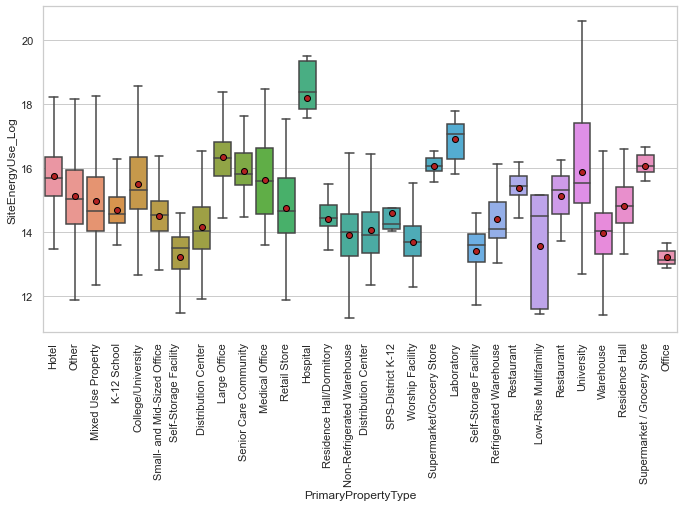

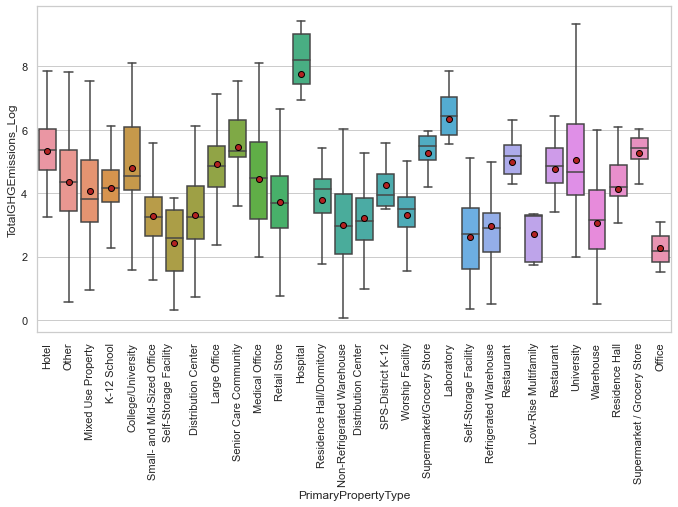

In [74]:
#Box plot affichant le grade nutritionnelle en abscisse et le score nutritionnelle en ordonnée
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black',
'markerfacecolor':'firebrick'}
sns.boxplot("PrimaryPropertyType",data_concat['SiteEnergyUse_Log'],data=data_concat,showfliers=False, showmeans=True, meanprops=meanprops)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black',
'markerfacecolor':'firebrick'}
sns.boxplot("PrimaryPropertyType",data_concat['TotalGHGEmissions_Log'],data=data_concat,showfliers=False, showmeans=True, meanprops=meanprops)
plt.xticks(rotation=90)
plt.show()

### <font color="blue" id="section_II_b">b. Analyses des relations entre les variables numériques</font>

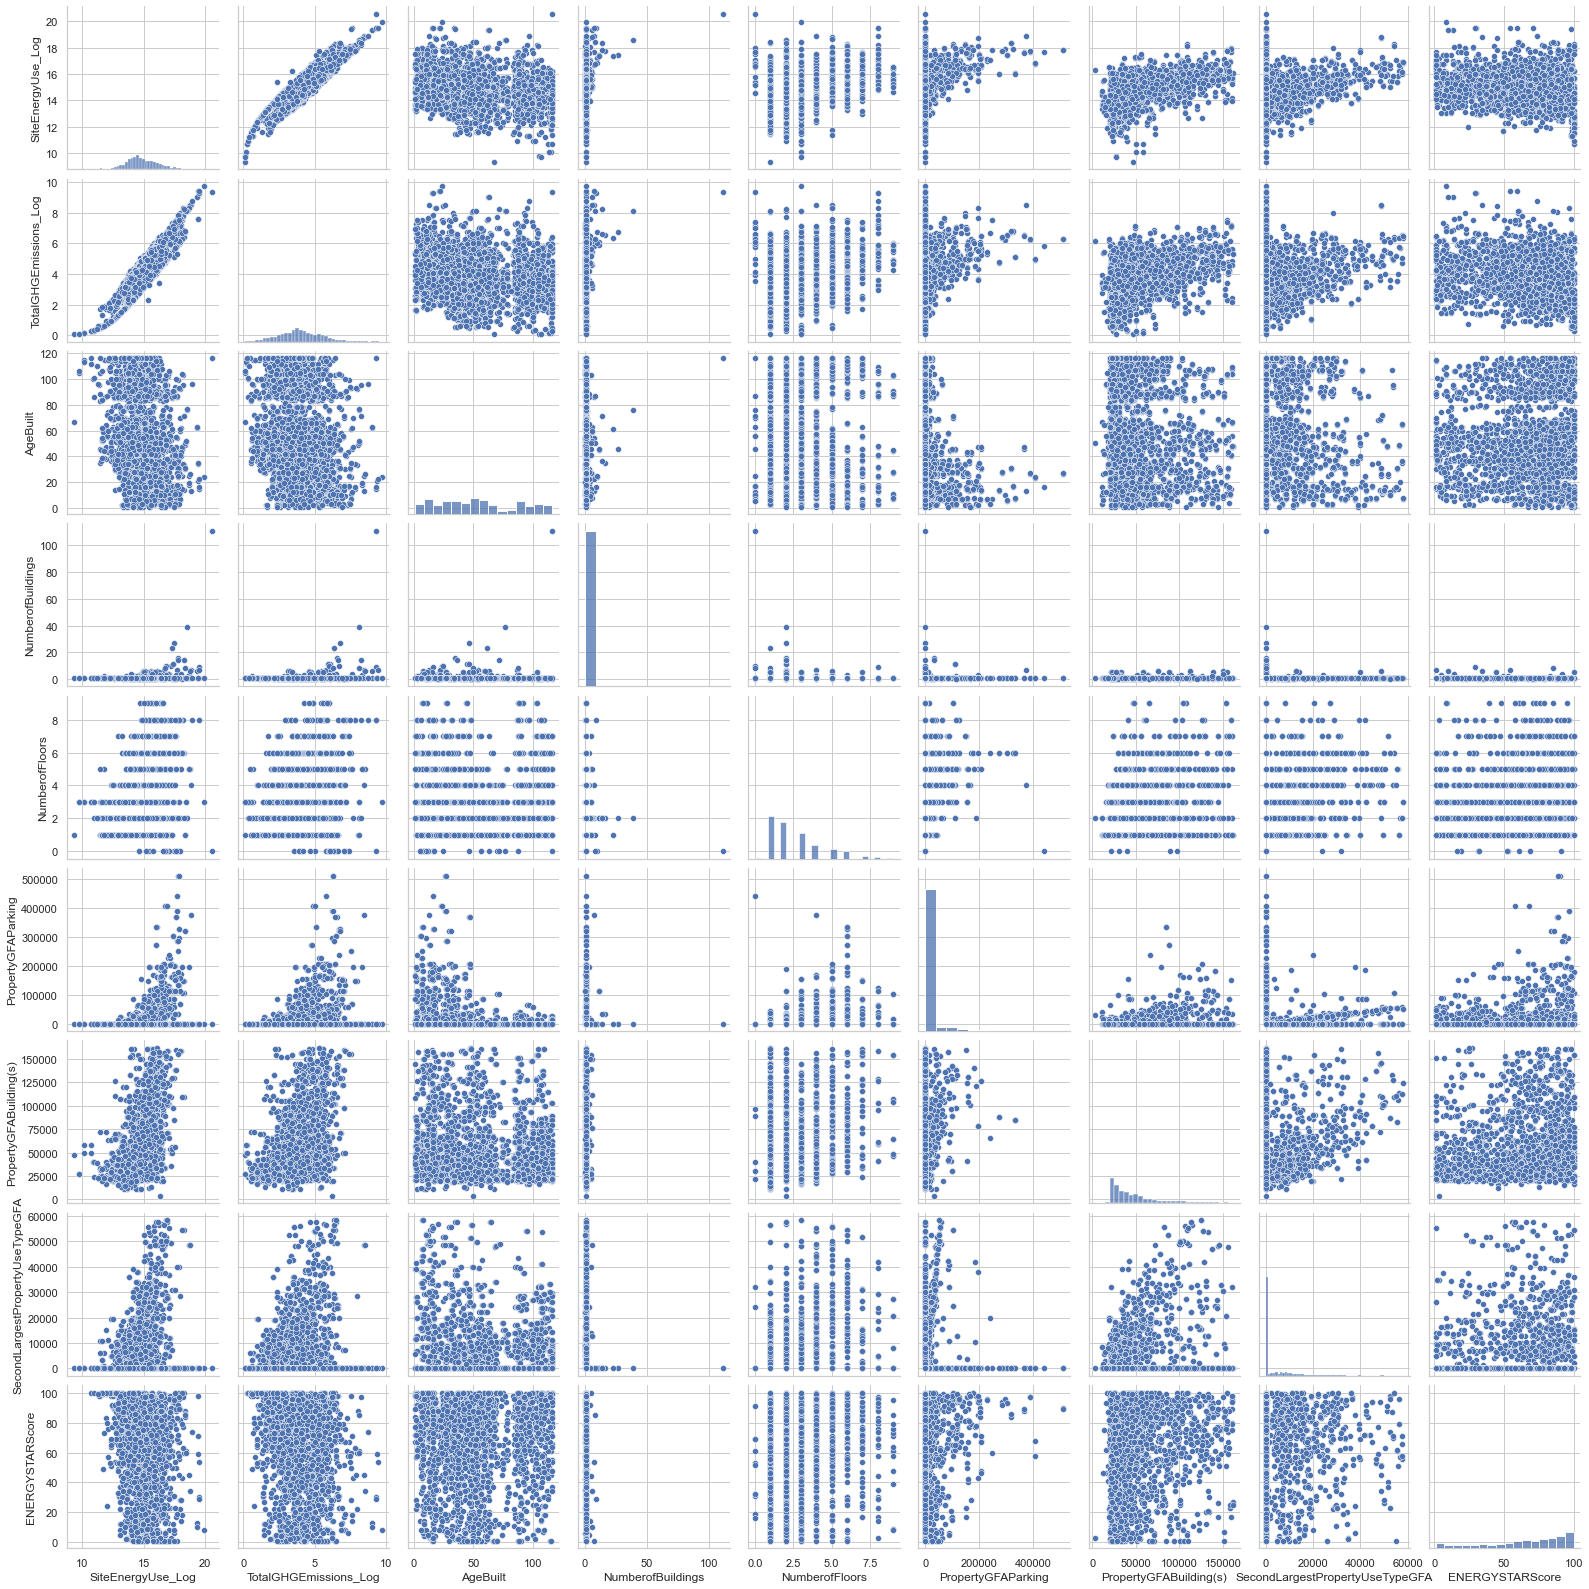

In [75]:
#Analyses des relations entre les variables numériques
var_num=[ 'SiteEnergyUse_Log',
 'TotalGHGEmissions_Log',
 'AgeBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore']
sns.pairplot(data_concat[var_num])

<AxesSubplot:>

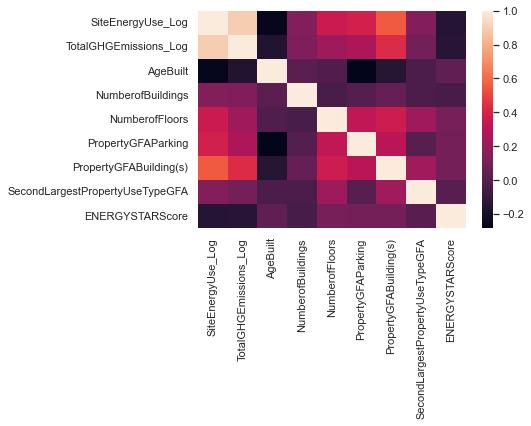

In [76]:
sns.heatmap(data_concat[var_num].corr())

In [77]:
data_concat.corr()

NumberofBuildings  NumberofFloors  \
NumberofBuildings                         1.000000       -0.036089   
NumberofFloors                           -0.036089        1.000000   
PropertyGFAParking                        0.000817        0.326400   
PropertyGFABuilding(s)                    0.053292        0.364747   
SecondLargestPropertyUseTypeGFA          -0.024039        0.218267   
ThirdLargestPropertyUseTypeGFA           -0.007470        0.086769   
ENERGYSTARScore                          -0.040636        0.103381   
SiteEnergyUse(kBtu)                       0.604334        0.136418   
SteamUse(kBtu)                            0.285798        0.125472   
TotalGHGEmissions                         0.349323        0.129817   
AgeBuilt                                  0.019034       -0.013690   
SiteEnergyUse_Log                         0.140575        0.356713   
TotalGHGEmissions_Log                     0.128914        0.226466   

                                 PropertyGFAParking  PropertyGFABuilding(s)  \
NumberofBuildings                          0.000817                0.053292   
NumberofFloors                             0.326400                0.364747   
PropertyGFAParking                         1.000000                0.306229   
PropertyGFABuilding(s)                     0.306229                1.000000   
SecondLargestPropertyUseTypeGFA            0.012208                0.230408   
ThirdLargestPropertyUseTypeGFA             0.240780                0.184119   
ENERGYSTARScore                            0.102262                0.099934   
SiteEnergyUse(kBtu)                        0.204484                0.493858   
SteamUse(kBtu)                             0.004581                0.160992   
TotalGHGEmissions                          0.094119                0.391837   
AgeBuilt                                  -0.283523               -0.150273   
SiteEnergyUse_Log                          0.386737                0.555745   
TotalGHGEmissions_Log                      0.265547                0.428005   

                                 SecondLargestPropertyUseTypeGFA  \
NumberofBuildings                                      -0.024039   
NumberofFloors                                          0.218267   
PropertyGFAParking                                      0.012208   
PropertyGFABuilding(s)                                  0.230408   
SecondLargestPropertyUseTypeGFA                         1.000000   
ThirdLargestPropertyUseTypeGFA                          0.059511   
ENERGYSTARScore                                         0.009653   
SiteEnergyUse(kBtu)                                    -0.004297   
SteamUse(kBtu)                                         -0.022331   
TotalGHGEmissions                                      -0.013905   
AgeBuilt                                               -0.025955   
SiteEnergyUse_Log                                       0.144851   
TotalGHGEmissions_Log                                   0.094788   

                                 ThirdLargestPropertyUseTypeGFA  \
NumberofBuildings                                     -0.007470   
NumberofFloors                                         0.086769   
PropertyGFAParking                                     0.240780   
PropertyGFABuilding(s)                                 0.184119   
SecondLargestPropertyUseTypeGFA                        0.059511   
ThirdLargestPropertyUseTypeGFA                         1.000000   
ENERGYSTARScore                                        0.026942   
SiteEnergyUse(kBtu)                                    0.291932   
SteamUse(kBtu)                                         0.001559   
TotalGHGEmissions                                      0.278234   
AgeBuilt                                              -0.071721   
SiteEnergyUse_Log                                      0.253577   
TotalGHGEmissions_Log                                  0.201427   

                                 ENERGYSTARScore  Sit

# <font color="#8333ff">     Partie 3: Modélisation

## <font color="blue">Sommaire</font>

1. [Corrélation entre la consommation totale d'énergie et les émission de CO2](#section_A) </br>
2. [Prédiction de la consommation totale d’énergie des bâtiments](#section_B)              
    a.[Préparation des données pour la modélisation](#section_B_a)</br>
    b.[Création d'un jeu de test et d'un jeu d'entrainement](#section_B_b)</br>
    c.[Création d'un modèle de base Dummy Regressor](#section_B_c)</br>
    d.[Evaluation sur le jeu de test de ce modèle (erreurs)](#section_B_d)</br>
    e.[Comparaison des modèles (à l'aide des métriques et du temps d'exécution)](#section_B_e)</br>
    f.[Cross Validation pour sélectionner 3 modèles](#section_B_f)</br>
    g.[Choix des hyperparamètres sur nos 3 modèles choisis](#section_B_g)</br>
    h.[Comparaison de nos modèles paramétrés avec les autres modèles et choix du modèle final](#section_B_h)</br>
    i.[Evaluation du modèle](#section_B_i)</br>
3. [Prédiction des émissions de CO2](#section_C)</br>
4. [Evaluation de l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions](#section_D)</br>
    a.[Feature importances pour le modèle XGBoost final](#section_D_a)</br>
    b.[Feature importance pour le modèle RandomForest final](#section_D_b)</br>



## <font color="red" id="section_A">1. Corrélation entre la consommation totale d'énergie et les émission de CO2</font>

In [78]:
data_concat.shape

(3273, 19)

In [79]:
#Statistiques descriptives des variables de notre dataframe "data_clean"
data_concat.describe(include="all")

BuildingType          PrimaryPropertyType Neighborhood  \
count             3273                         3273         3273   
unique               5                           30           19   
top     NonResidential  Small- and Mid-Sized Office     DOWNTOWN   
freq              2896                          582          721   
mean               NaN                          NaN          NaN   
std                NaN                          NaN          NaN   
min                NaN                          NaN          NaN   
25%                NaN                          NaN          NaN   
50%                NaN                          NaN          NaN   
75%                NaN                          NaN          NaN   
max                NaN                          NaN          NaN   

        NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count         3273.000000     3012.000000          3273.00000   
unique                NaN             NaN                 NaN   
top                   NaN             NaN                 NaN   
freq                  NaN             NaN                 NaN   
mean             1.118851        2.708499         13389.23923   
std              2.234343        1.785404         43851.98058   
min              0.000000        0.000000             0.00000   
25%              1.000000        1.000000             0.00000   
50%              1.000000        2.000000             0.00000   
75%              1.000000        4.000000             0.00000   
max            111.000000        9.000000        512608.00000   

        PropertyGFABuilding(s) LargestPropertyUseType  \
count              2838.000000                   3204   
unique                     NaN                     57   
top                        NaN                 Office   
freq                       NaN                    960   
mean              52511.430233                    NaN   
std               33565.300279                    NaN   
min                3636.000000                    NaN   
25%               26672.500000                    NaN   
50%               40662.000000                    NaN   
75%               66493.750000                    NaN   
max              161678.000000                    NaN   

       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
count                          3273                      3273.000000   
unique                           48                              NaN   
top                            None                              NaN   
freq                           1622                              NaN   
mean                            NaN                      5545.088756   
std                             NaN                     10460.339380   
min                             NaN                         0.000000   
25%                             NaN                         0.000000   
50%                             NaN                         0.000000   
75%                             NaN                      7505.000000   
max                             NaN                     58218.000000   

       ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
count                         3273                     3273.000000   
unique                          41                             NaN   
top                           None                             NaN   
freq                          2597                             NaN   
mean                           NaN                     2913.031591   
std                            NaN                    16010.668641   
min                            NaN                        0.000000   
25%                            NaN                        0.000000   
50%                            NaN                        0.000000   
75%                            NaN                        0.000000   
max                            NaN                   459748.000000   

        ENERGYSTARSco

Comme nous l'avons vu à l'aide de la heatmap des variables, il existe un lien entre la consommation totale d'énergie et les émission de CO2.
Regardons la corrélation de Pearson entre ses deux variables.

In [80]:
from scipy.stats import pearsonr 

  
energy = data_concat['SiteEnergyUse_Log'] 
emissionsCO2 = data_concat['TotalGHGEmissions_Log'] 
  
corr, _ = pearsonr(energy, emissionsCO2) 
print('La correlation de Pearson est de : %.3f' % corr) 

La correlation de Pearson est de : 0.895


Il y a donc une forte corrélation positive entre la consommation totale d'energie et les émissions de CO2.

On cherche à prédire la consommation totale d’énergie de bâtiments **'SiteEnergyUse_Log'** ainsi que les émissions de CO2
**'TotalGHGEmissions_Log'**.</br>
Etant donné la corrélation entre ces 2 variables, nous pouvons dire qu'en prédisant la consommation totale d'énergie de 
bâtiments, nous pourrions retrouver les prédiction des émissions de CO2.

## <font color="red" id="section_B">2. Prédiction de la consommation totale d’énergie des bâtiments </font>

### <font color="blue" id="section_B_a">a. Préparation des données pour la modélisation </font>

Nous allons faire le choix de garder dans nos prédictions la variable **'ENERGYSTARScore'**.</br>
En effet, nous verrons, dans la dernière partie de notre travail, l'intérêt de l'énergie Star Score pour la prédiction
d'émissions ou de consommation énergétique (puisque fortement corrélés), en regardant l'importance de cette variable 
dans nos features importances.

On remplace les valeurs manquantes des variables numériques par la médiane.</br>
Et nous allons remplacer les variables catégorielles en valeurs numériques pour pouvoir les intégrer dans notre modélisation.


In [81]:
data_concat.select_dtypes(['number']).columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'TotalGHGEmissions',
       'AgeBuilt', 'SiteEnergyUse_Log', 'TotalGHGEmissions_Log'],
      dtype='object')

In [82]:
var_num = ['NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore','AgeBuilt']

var_categ = data_concat.select_dtypes(['object']).columns

In [83]:
var_categ

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='object')

In [84]:
liste1=['NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore','AgeBuilt','BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType']
data_model = data_concat[liste1]
data_model.head()

NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                1.0             NaN                   0   
1                1.0             NaN               15064   
2                1.0             NaN                   0   
4                1.0             NaN               12460   
5                1.0             2.0               37198   

   PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA  \
0                 88434.0                              0.0   
1                 88502.0                          15064.0   
2                     NaN                              0.0   
4                107430.0                              0.0   
5                 60090.0                              0.0   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  AgeBuilt  \
0                             0.0             65.0        88   
1                          4622.0             51.0        19   
2                             0.0             18.0        46   
4                             0.0             67.0        35   
5                             0.0              NaN        16   

         BuildingType PrimaryPropertyType Neighborhood LargestPropertyUseType  \
0      NonResidential               Hotel     DOWNTOWN                  Hotel   
1      NonResidential               Hotel     DOWNTOWN                  Hotel   
2      NonResidential               Hotel     DOWNTOWN                  Hotel   
4      NonResidential               Hotel     DOWNTOWN                  Hotel   
5  Nonresidential COS               Other     DOWNTOWN         Police Station   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType  
0                         None                        None  
1                      Parking                  Restaurant  
2                      Parking               Swimming Pool  
4                      Parking               Swimming Pool  
5                         None                        None

In [85]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


Nous allons créer une pipeline. Cela nous permettra de traiter plus facilement notre dataset qui est hétérogène, c'est à 
dire qu'il contient différents types de variables : discrètes, continues, catégorielles.
Nous allons encoder les variables catégorielles et imputer les valeurs manquantes, s'il en existe.
                
                                                                  

 Le pipeline est un élément du processeur où les instructions sont découpées en plusieurs tâches afin d'être exécutées.

In [86]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#On définit une Pipeline à nos variables numériques, i.e. une chaine de transformation que nos variables subissent
pipeline_num = Pipeline([('imputer', SimpleImputer(strategy="median", fill_value="missing")),
                        ('scaler', StandardScaler())])

#Pipeline des variables catégorielle
pipeline_categ = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
                         ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

#Column_transformer permet d'appliquer nos transformers sur les colonnes que nous sélectionnons
#On obtient un transformer que l'on nomme preprocessor
preprocessor=ColumnTransformer(transformers=[('cat', pipeline_categ, var_categ),('num', pipeline_num, var_num)])



### <font color="blue" id="section_B_b">b. Création d'un jeu de test et d'un jeu d'entrainement </font>

Nous allons créer un jeu de test qui correspond à 20% de nos données et un jeu d'entrainement à 80%. Nous allons
utiliser un random_state car en definissant un entier à random_state, celui-ci vous garantiras,  que la même
séquence de nombres aléatoires est générée chaque fois que vous exécutez le code.

In [87]:
from sklearn.model_selection import train_test_split

y = data_concat["SiteEnergyUse_Log"]
X = data_concat.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse_Log", "TotalGHGEmissions","TotalGHGEmissions_Log"], axis=1)

# Création d'un jeu d'entrainement (train set) et d'un jeu de test (test set)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [88]:
# transformation des variables
X_train = preprocessor.fit_transform(X_train)

In [89]:
X_train.shape

(2618, 204)

### <font color="blue" id="section_B_c">c. Création d'un modèle de base DummyRegressor </font>

### Baseline : DummyRegressor

Nous allons utiliser DummyRegressor comme modèle regresseur de base. Ce régresseur est utile comme base de référence simple à comparer avec d'autres régresseurs (réels). C'est un Classificateur qui fait des prédictions à l'aide de règles simples.
Il est utilisée ici pour prédire la médiane des valeurs cibles d'entraînement.

In [90]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="median")
dummy.fit(X_train, y_train)

DummyRegressor(strategy='median')

### <font color="blue" id="section_B_d">d. Evaluation sur le jeu de test de ce modèle (erreurs)</font>

Nous aurons besoin de créer une fonction permettant de mesurer les erreurs MAE, RMSE ainsi que le R² score.
En effet pour évaluer notre modèle,nous devons utiliser des métriques d'erreur spécialement conçues pour évaluer les prédictions 
faites sur les problèmes de régression.</br>
La **MAE** est la moyenne arithmétique des valeurs absolues des écarts entre la prédiction et l'observation réelle.
Elle mesure l'ampleur moyenne des erreurs dans un ensemble de prédictions, sans tenir compte de leur direction.
</br>
La **RMSE** est la racine carrée du MSE.Cet indice fournit une indication par rapport à la dispersion ou 
la variabilité de la qualité de la prédiction. </br><br
Les deux métriques **MAE et RMSE** peuvent varier de 0 à ∞ et sont
 indifférentes à la direction des erreurs.
Ce sont des scores orientés négativement, ce qui signifie que les valeurs inférieures sont meilleures.
Puisque les erreurs sont mises au carré avant de faire la moyenne, le RMSE donne un poids relativement élevé
aux erreurs importantes.</br>
</br>
La RMSE donne plus d'importance aux erreurs les plus élevées, elle est donc plus sensible aux valeurs aberrantes 
alors que la MAE est plus robuste aux valeurs aberrantes. RMSE et MSE fonctionnent sur le principe de la moyenne 
des erreurs tandis que le calcul MAE est basé sur la médiane de l'erreur.</br>
Le *R² score* est compris entre 0 et 1, et croît avec l'adéquation de la régression au modèle: </br>
– Si le R² est proche de zéro, alors la droite de régression colle à 0% avec l'ensemble des points donnés.</br>
Plus R2 est proche de 1, meilleure est la prédiction.</br>


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#Fonction qui calcule les différentes métriques de la régression 
def metriques_regression(y_test, y_pred):
        
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2Score = r2_score(y_test, y_pred)
    #Affichage des valeurs des métriques MAE, RMSE, et R2 Score
    print("MAE: ",mae)
    print("MSE: ",mse)
    print("RMSE: ", rmse)
    print("R²: ", r2Score)

Après avoir formé le modèle de base, nous allons l'évaluer sur l'ensemble du jeu de test en utilisant "predict" pour prédire la médiane.

In [92]:
# Prédiction à l'aide de notre dummy regressor
# Evaluation du modèle
X_test = preprocessor.transform(X_test)
y_pred = dummy.predict(X_test)
metriques_regression(np.array(y_test), y_pred)

MAE:  1.0279911274028095
MSE:  1.7578644560245067
RMSE:  1.3258448084238617
R²:  -0.02583993282842001


In [93]:
#Statistiques descriptives de la consommation totale d'energie
data_concat["SiteEnergyUse_Log"].describe(include="all")

count    3273.000000
mean       14.894254
std         1.319992
min         9.345046
25%        14.024818
50%        14.736717
75%        15.741723
max        20.588504
Name: SiteEnergyUse_Log, dtype: float64

In [94]:
y_test.shape

(655,)

(array([39., 52., 41., 40., 34., 36., 27., 34., 29., 29., 27., 28., 23.,
        20., 22., 18., 20., 14., 18.,  7.,  6., 18.,  8.,  5., 13.,  8.,
         3.,  2.,  1.,  8.,  1.,  5.,  4.,  3.,  2.,  0.,  1.,  1.,  2.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([2.03471037e-03, 9.69291049e-02, 1.91823499e-01, 2.86717894e-01,
        3.81612289e-01, 4.76506683e-01, 5.71401078e-01, 6.66295472e-01,
        7.61189867e-01, 8.56084261e-01, 9.50978656e-01, 1.04587305e+00,
        1.14076744e+00, 1.23566184e+00, 1.33055623e+00, 1.42545063e+00,
        1.52034502e+00, 1.61523942e+00, 1.71013381e+00, 1.80502821e+00,
        1.89992260e+00, 1.99481700e+00, 2.08971139e+00, 2.18460578e+00,
        2.27950018e+00, 2.37439457e+00, 2.46928897e+00, 2.56418336e+00,
        2.65907776e+00, 2.75397215e+00, 2.84886655e+00, 2.94376094e+00,
        3.03865534e+00, 3.13354973e+00, 3.22844412e+00, 3.32333852e+00,
        3.41823291e+00, 3.51312731e+00, 3.60802170e+00, 3.70291610e+

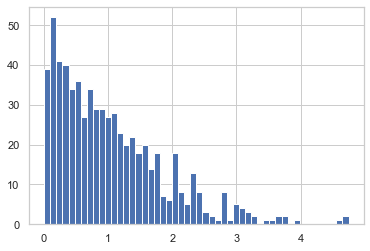

In [95]:
#regardons l'erreur de notre baseline sous forme d'histogramme
#l'erreur étant la valeur absolue de la différence entre la valeur réelle et la valeur prédite
erreur_hist = np.abs(y_test- y_pred)
#On crée 50 intervalles dans cet histogramme
plt.hist (erreur_hist,bins=50)

(array([428., 180.,  39.,   8.]),
 array([2.03471037e-03, 1.18821464e+00, 2.37439457e+00, 3.56057451e+00,
        4.74675444e+00]),
 <BarContainer object of 4 artists>)

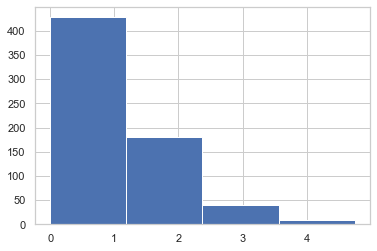

In [96]:
#Si on splitte cette histogramme en 4 intervalles pour déterminer la quantité de prédictions avec une erreur de plus de 1
plt.hist (erreur_hist,bins=4)

on voit dans ce graphique que sur toutes les prédictions faites avec ce modèle, 17 (sur 655) d'entre elles ont une erreur très
proche de 0. Un peu plus de 400 prédictions ont une erreur comprise entre 0 et 1. et donc environs 250 ont une erreur
entre un peu plus de 1 et 4,5 environs.</br>
On voit que nos erreurs suivent une loi de distribution exponentielle (ce qui est normal).

### <font color="blue" id="section_B_e">e. Comparaison des modèles (à l'aide des métriques et du temps d'exécution) </font>

Nous sommes confrontés à un modèle de régression. Nous allons donc choisir plusieurs types de méthodes de régression pour
comparer nos modèles : 
- des méthodes **linéaires** : la régression linéaire ainsi que la régression Ridge et Lasso
- des méthodes **non linéaires** : le Support Vecteur Machine (que l'on peut considérer comme étant linéaire aussi) et
la régression linéaire ridge avec noyau,
- des méthodes **ensemblistes de bagging** (Bagging, Random Forest) et de **boosting** (AdaBoost, Gradient Boosting, XGBoost).

In [97]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [98]:
# importation des différents modèles de régression
from sklearn.linear_model import  LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb

dummy = DummyRegressor(strategy="median")
linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decisionTree_reg =  DecisionTreeRegressor()
svm_reg = SVR()
ridge_kernel = KernelRidge()
adaboost_reg = AdaBoostRegressor()
bagging_reg = BaggingRegressor()
gradboost_reg = GradientBoostingRegressor()
rdmforest_reg = RandomForestRegressor()
xgboost_reg = xgb.XGBRegressor()

Nous allons utiliser le module **timeit** pour déterminer le temps d'exécution de chacun de nos modèles.</br>
Nous allons comparer leurs métriques d'erreurs, le temps d'entrainement et le temps de prédiction.

In [99]:
import timeit

#On crée une fonction qui va permettre de comparer nos métriques et temps d'exécution entre nos modèles
def comparaison_model(liste1,liste2):
    #On initialise metrics_time
    metrics_time = {}
    
    liste3 = ["MAE", "MSE", "RMSE", "R² score","temps d'entrainement","temps prediction"]

    #Pour chacun de nos modèles, nous allons:
    for modele in liste1 :
        # calculer leurs temps d'éxécution
        time_start = timeit.default_timer()
    
        # calculer leurs temps d'entraînement
        modele.fit(X_train, y_train)    
        time_fit = timeit.default_timer() - time_start
    
        # calculer leurs temps de prediction
        y_pred = modele.predict(X_test)
        time_pred = timeit.default_timer() - time_start
    
        # calculer leurs métriques de regression
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(2)
        
        metrics_time[modele] = (mae, mse, rmse, r_score, time_fit, time_pred)

    tab = pd.DataFrame(metrics_time, index= liste3)
    tab.columns = liste2

    return tab

# TODO CV


In [100]:
# On crée une liste de modèles pour notre fonction
liste1 = [dummy, linear_reg, ridge, lasso, decisionTree_reg, svm_reg, ridge_kernel, adaboost_reg, bagging_reg,
         gradboost_reg, rdmforest_reg, xgboost_reg]
liste2 = ["Dummy Regressor","Linear Regression", "Ridge", "Lasso", "Decision Tree", "SVM", "Ridge Kernel",
                      "AdaBoost", "Bagging", "Gradient Boosting", "Random Forest", "XGBoost"]

comparaison_model(liste1,liste2)

Dummy Regressor  Linear Regression     Ridge     Lasso  \
MAE                          1.027991       1.478315e+09  0.600179  1.032115   
MSE                          1.757864       7.855493e+20  0.637576  1.716518   
RMSE                         1.325845       2.802765e+10  0.798483  1.310159   
R² score                    -0.030000      -4.584243e+20  0.630000 -0.000000   
temps d'entrainement         0.001911       7.321300e-02  0.016256  0.012077   
temps prediction             0.002181       7.382690e-02  0.016889  0.012668   

                      Decision Tree       SVM  Ridge Kernel  AdaBoost  \
MAE                        0.314331  0.451220      0.617839  0.641353   
MSE                        0.349535  0.495879      0.668064  0.726960   
RMSE                       0.591215  0.704187      0.817352  0.852620   
R² score                   0.800000  0.710000      0.610000  0.580000   
temps d'entrainement       0.076554  0.876380      0.306102  0.699660   
temps prediction           0.077642  1.307061      0.328136  0.714507   

                       Bagging  Gradient Boosting  Random Forest   XGBoost  
MAE                   0.347765           0.423189       0.314640  0.317829  
MSE                   0.262192           0.330987       0.230167  0.205224  
RMSE                  0.512047           0.575315       0.479757  0.453017  
R² score              0.850000           0.810000       0.870000  0.880000  
temps d'entrainement  0.328896           1.200065       3.401262  2.285243  
temps prediction      0.340530           1.203375       3.425780  2.291907

On remarque qu'il existe une corrélation entre le R2 score et la RMSE. 
Plus le R2 score est élevé, et plus la RMSE est basse.

Plus la MAE est faible, plus un modèle s'adapte à un ensemble de données.
Plus le RMSE est bas, mieux un modèle s'ajuste à un ensemble de données.
Nous sélectionnerions alors le modèle avec la valeur RMSE la plus faible comme le "meilleur" modèle car c'est celui
qui fait les prédictions les plus proches des valeurs réelles de l'ensemble de données.
Plus le R2 score est proche de 1, plus le modèle est parfait.

In [101]:
#Nous allons enlever la régression linéaire car elle présente un bien trop grand écart de RMSE avec les autres modèles
liste1 = [dummy,  ridge, lasso, decisionTree_reg, svm_reg, ridge_kernel, adaboost_reg, bagging_reg,
         gradboost_reg, rdmforest_reg, xgboost_reg]
liste2 = ["Dummy Regressor","Ridge", "Lasso", "Decision Tree", "SVM", "Ridge Kernel",
                      "AdaBoost", "Bagging", "Gradient Boosting", "Random Forest", "XGBoost"]
tab=comparaison_model(liste1,liste2)
tab.iloc[2]

Dummy Regressor      1.325845
Ridge                0.798483
Lasso                1.310159
Decision Tree        0.597761
SVM                  0.704187
Ridge Kernel         0.817352
AdaBoost             0.856373
Bagging              0.511116
Gradient Boosting    0.576430
Random Forest        0.478293
XGBoost              0.453017
Name: RMSE, dtype: float64

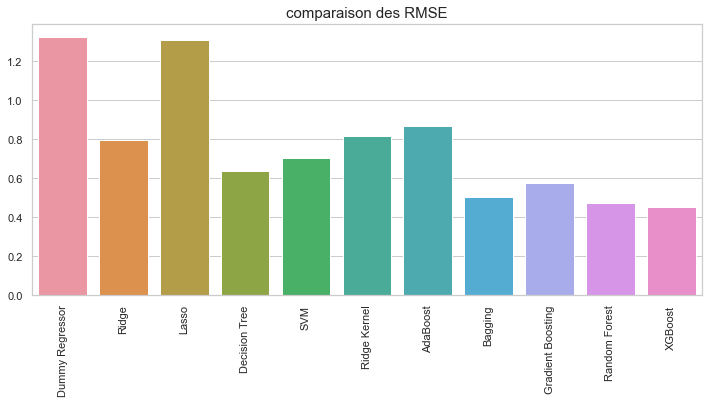

In [102]:
tab=comparaison_model(liste1,liste2)
fig = plt.figure(1, figsize=(12, 5))
sns.barplot(x=tab.iloc[2].index,y=tab.iloc[2].values)
plt.xticks(rotation=90)
plt.title('comparaison des RMSE', size=15)
plt.show()

On voit bien que parmis les modèles non linéaires, le XGBoost et le RandomForest présente les erreurs les plus faibles.
Et parmis les modèles non linéaires, le Ridge est celui qui a un RMSE le plus petit.

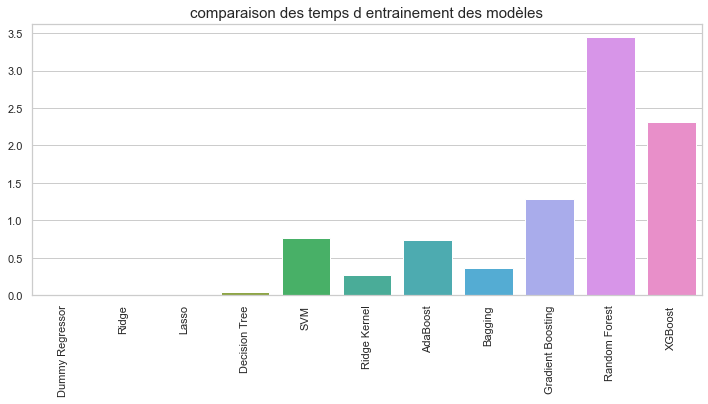

In [103]:
tab=comparaison_model(liste1,liste2)
fig = plt.figure(1, figsize=(12, 5))
sns.barplot(x=tab.iloc[4].index,y=tab.iloc[4].values)
plt.xticks(rotation=90)
plt.title('comparaison des temps d entrainement des modèles', size=15)
plt.show()

On voit que les 2 modèles Random Forest et XGBoost ont des temps d'exécution plus élevés que les autres, mais nous allons
préféré la qualité du modèle au temps émis puisque est au maximim de 3s et reste tout de même petit.

### <font color="blue" id="section_B_f">f. Cross Validation pour sélectionner 3 modèles </font>

In [104]:
#liste de nos modèles à évaluer
liste = [dummy,linear_reg, ridge, lasso, decisionTree_reg, svm_reg, ridge_kernel, adaboost_reg, bagging_reg,
         gradboost_reg, rdmforest_reg, xgboost_reg]

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
#On calcule les cross validations de nos modèles en splittant en 5 scores et on évalue avec le métrique RMSE
#On fait la moyenne de ces 5 scores et on retient le modèle qui a le meilleur score
for modele in liste :
    print('la cross valisation de ',modele,'est :',cross_val_score(modele,X_train,y_train,cv=5,scoring='neg_root_mean_squared_error').mean())

la cross valisation de  DummyRegressor(strategy='median') est : -1.331129188743203
la cross valisation de  LinearRegression() est : -34797298978.903915
la cross valisation de  Ridge() est : -0.8412188582976278
la cross valisation de  Lasso() est : -1.3224803104765448
la cross valisation de  DecisionTreeRegressor() est : -0.693632807859839
la cross valisation de  SVR() est : -0.729546617574236
la cross valisation de  KernelRidge() est : -0.8876466488748733
la cross valisation de  AdaBoostRegressor() est : -0.8837719621493065
la cross valisation de  BaggingRegressor() est : -0.5874430851731705
la cross valisation de  GradientBoostingRegressor() est : -0.6451751432402938
la cross valisation de  RandomForestRegressor() est : -0.5535258258928056
la cross valisation de  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interactio

#### Conclusion :

Le meilleur modèle semble être le **XGBoost**, car le score de la cross validation est le plus élevé, et le temps 
d'entrainement et de prédiction est d'un peu moins de 2 secondes. Ce qui est mieux que les presques 7 secondes du 
Random Forest par exemple.</br>
Nous allons également choisir des hyperparamètres pour le modèle linéaire **ridge** qui nous semble avoir le meilleur 
score parmis les régressions linéaires, ce qui nous permettra de retrouver les coefficients de nos features, et ainsi vérifier l'importance de 
l'ENERGYSTARScore pour notre modèle.</br>
De plus, en modèle non linéaire, nous allons choisir, pour la suite, les modèle XGBoost et **Random Forest** car ils 
ont les meilleurs métriques.

### <font color="blue" id="section_B_g">g. Choix des hyperparamètres sur nos 3 modèles choisis</font>

Dans notre choix d'hyperparamètres, et donc dans notre validation croisée, nous allons choisir de comparer la métrique 
**RMSE** de nos modèles choisis.
Elle me semble etre la plus simple à comparer, nous choisirons la RMSE la plus faible.

### 1. Un modèle linéaire : modèle ridge.

In [107]:
# modèle sélectionné
ridge = Ridge()

In [108]:
#Regardons les paramètres actuelles de notre modèle
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

**Hyperparamètres fréquemment réglés**
- **alpha :** correspond à la régularisation qui améliore le conditionnement du problème et réduit la variance des 
    estimations. 


In [109]:
# Gridsearch de la meilleure configuration d'hyperparamètres avec cv
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.logspace(-5, 5, 1000)                
}

grid_ridge = GridSearchCV(ridge,
                          params, cv=5,
                          scoring = 'neg_root_mean_squared_error',
                          verbose=5)
grid_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ......................alpha=1e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......................alpha=1e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......................alpha=1e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......................alpha=1e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......................alpha=1e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=1.0233165783302449e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=1.0233165783302449e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=1.0233165783302449e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=1.0233165783302449e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=1.0233165783302449e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=1.0471768194855202e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=1.0471768194855202e-

[CV 5/5] END .....alpha=1.5856239617711373e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=1.622595287078087e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=1.622595287078087e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=1.622595287078087e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=1.622595287078087e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=1.622595287078087e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=1.6604286571875295e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=1.6604286571875295e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=1.6604286571875295e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=1.6604286571875295e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=1.6604286571875295e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=1.699144172034626e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=1.6

[CV 5/5] END ......alpha=2.694203713681882e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=2.7570233256095827e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=2.7570233256095827e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=2.7570233256095827e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=2.7570233256095827e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=2.7570233256095827e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=2.8213076759394707e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=2.8213076759394707e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=2.8213076759394707e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=2.8213076759394707e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=2.8213076759394707e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=2.8870909173592348e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=2.88

[CV 3/5] END ......alpha=4.577840538376616e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=4.577840538376616e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=4.577840538376616e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=4.684580115873045e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=4.684580115873045e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=4.684580115873045e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=4.684580115873045e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=4.684580115873045e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=4.793808495089107e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=4.793808495089107e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=4.793808495089107e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=4.793808495089107e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=4.7

[CV 5/5] END ......alpha=7.601177617955322e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=7.778411071286482e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=7.778411071286482e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=7.778411071286482e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=7.778411071286482e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=7.778411071286482e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=7.959777002314978e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=7.959777002314978e-05;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=7.959777002314978e-05;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=7.959777002314978e-05;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=7.959777002314978e-05;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=8.145371766280736e-05;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=8.1

[CV 3/5] END .....alpha=0.00013216641839466052;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=0.00013216641839466052;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=0.00013216641839466052;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=0.00013524808704178755;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=0.00013524808704178755;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=0.00013524808704178755;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=0.00013524808704178755;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=0.00013524808704178755;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=0.00013840160965731315;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=0.00013840160965731315;, score=-0.872 total time=   0.0s
[CV 3/5] END .....alpha=0.00013840160965731315;, score=-0.835 total time=   0.0s
[CV 4/5] END .....alpha=0.00013840160965731315;, score=-0.805 total time=   0.0s
[CV 5/5] END .....alpha=0.00

[CV 5/5] END .....alpha=0.00021945290862033137;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0002245697995539774;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0002245697995539774;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0002245697995539774;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0002245697995539774;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0002245697995539774;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0002298059988758851;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0002298059988758851;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0002298059988758851;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0002298059988758851;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0002298059988758851;, score=-0.875 total time=   0.0s
[CV 1/5] END .....alpha=0.00023516428844943486;, score=-0.817 total time=   0.0s
[CV 2/5] END .....alpha=0.00

[CV 3/5] END .......alpha=0.000390473523688556;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.000390473523688556;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.000390473523688556;, score=-0.875 total time=   0.0s
[CV 1/5] END .......alpha=0.000399578030189527;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.000399578030189527;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.000399578030189527;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.000399578030189527;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.000399578030189527;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0004088948226294864;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0004088948226294864;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0004088948226294864;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0004088948226294864;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0

[CV 3/5] END ......alpha=0.0006789406812696112;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0006789406812696112;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0006789406812696112;, score=-0.875 total time=   0.0s
[CV 1/5] END .......alpha=0.000694771254846024;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.000694771254846024;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.000694771254846024;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.000694771254846024;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.000694771254846024;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0007109709432312439;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0007109709432312439;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0007109709432312439;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0007109709432312439;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0

[CV 5/5] END ......alpha=0.0011273325637104871;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0011536181017364785;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0011536181017364785;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0011536181017364785;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0011536181017364785;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0011536181017364785;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0011805165285688056;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0011805165285688056;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0011805165285688056;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0011805165285688056;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0011805165285688056;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0012080421346773289;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0

[CV 4/5] END ......alpha=0.0018292045048462937;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0018292045048462937;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0018718552949655793;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0018718552949655793;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0018718552949655793;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0018718552949655793;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0018718552949655793;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0019155005555735278;, score=-0.817 total time=   0.0s
[CV 2/5] END ......alpha=0.0019155005555735278;, score=-0.872 total time=   0.0s
[CV 3/5] END ......alpha=0.0019155005555735278;, score=-0.835 total time=   0.0s
[CV 4/5] END ......alpha=0.0019155005555735278;, score=-0.805 total time=   0.0s
[CV 5/5] END ......alpha=0.0019155005555735278;, score=-0.875 total time=   0.0s
[CV 1/5] END ......alpha=0.0

[CV 4/5] END .......alpha=0.003108082173869064;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.003108082173869064;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0.00318055201533292;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.00318055201533292;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.00318055201533292;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.00318055201533292;, score=-0.805 total time=   0.0s
[CV 5/5] END ........alpha=0.00318055201533292;, score=-0.874 total time=   0.0s
[CV 1/5] END .......alpha=0.003254711605531848;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.003254711605531848;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.003254711605531848;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.003254711605531848;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.003254711605531848;, score=-0.874 total time=   0.0s
[CV 1/5] END ......alpha=0.0

[CV 2/5] END .......alpha=0.005160748710385908;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.005160748710385908;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.005160748710385908;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.005160748710385908;, score=-0.874 total time=   0.0s
[CV 1/5] END .......alpha=0.005281079711934331;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.005281079711934331;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.005281079711934331;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.005281079711934331;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.005281079711934331;, score=-0.874 total time=   0.0s
[CV 1/5] END .......alpha=0.005404216420705915;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.005404216420705915;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.005404216420705915;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.

[CV 1/5] END .......alpha=0.008569055051268348;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.008569055051268348;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.008569055051268348;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.008569055051268348;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.008569055051268348;, score=-0.874 total time=   0.0s
[CV 1/5] END .......alpha=0.008768856094587427;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.008768856094587427;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.008768856094587427;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.008768856094587427;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.008768856094587427;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0.00897331581458352;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.00897331581458352;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 1/5] END .......alpha=0.014899550728528537;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.014899550728528537;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.014899550728528537;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.014899550728528537;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.014899550728528537;, score=-0.874 total time=   0.0s
[CV 1/5] END .......alpha=0.015246957270175731;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.015246957270175731;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.015246957270175731;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.015246957270175731;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.015246957270175731;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0.01560246414366368;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.01560246414366368;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 4/5] END .......alpha=0.025906778586880088;, score=-0.805 total time=   0.0s
[CV 5/5] END .......alpha=0.025906778586880088;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0.02651083601908539;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.02651083601908539;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.02651083601908539;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.02651083601908539;, score=-0.805 total time=   0.0s
[CV 5/5] END ........alpha=0.02651083601908539;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0.02712897800372467;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.02712897800372467;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.02712897800372467;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.02712897800372467;, score=-0.805 total time=   0.0s
[CV 5/5] END ........alpha=0.02712897800372467;, score=-0.874 total time=   0.0s
[CV 1/5] END ........alpha=0

[CV 1/5] END ........alpha=0.04504573251759458;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.04504573251759458;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.04504573251759458;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.04504573251759458;, score=-0.804 total time=   0.0s
[CV 5/5] END ........alpha=0.04504573251759458;, score=-0.873 total time=   0.0s
[CV 1/5] END .......alpha=0.046096044868284336;, score=-0.817 total time=   0.0s
[CV 2/5] END .......alpha=0.046096044868284336;, score=-0.872 total time=   0.0s
[CV 3/5] END .......alpha=0.046096044868284336;, score=-0.835 total time=   0.0s
[CV 4/5] END .......alpha=0.046096044868284336;, score=-0.804 total time=   0.0s
[CV 5/5] END .......alpha=0.046096044868284336;, score=-0.873 total time=   0.0s
[CV 1/5] END ........alpha=0.04717084690917017;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.04717084690917017;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 1/5] END ........alpha=0.07479522515621821;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.07479522515621821;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.07479522515621821;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.07479522515621821;, score=-0.804 total time=   0.0s
[CV 5/5] END ........alpha=0.07479522515621821;, score=-0.872 total time=   0.0s
[CV 1/5] END ........alpha=0.07653919388230147;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.07653919388230147;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.07653919388230147;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.07653919388230147;, score=-0.803 total time=   0.0s
[CV 5/5] END ........alpha=0.07653919388230147;, score=-0.872 total time=   0.0s
[CV 1/5] END ........alpha=0.07832382599179197;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.07832382599179197;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 1/5] END ..........alpha=0.130051125217341;, score=-0.817 total time=   0.0s
[CV 2/5] END ..........alpha=0.130051125217341;, score=-0.872 total time=   0.0s
[CV 3/5] END ..........alpha=0.130051125217341;, score=-0.835 total time=   0.0s
[CV 4/5] END ..........alpha=0.130051125217341;, score=-0.803 total time=   0.0s
[CV 5/5] END ..........alpha=0.130051125217341;, score=-0.871 total time=   0.0s
[CV 1/5] END .........alpha=0.1330834724654076;, score=-0.817 total time=   0.0s
[CV 2/5] END .........alpha=0.1330834724654076;, score=-0.872 total time=   0.0s
[CV 3/5] END .........alpha=0.1330834724654076;, score=-0.835 total time=   0.0s
[CV 4/5] END .........alpha=0.1330834724654076;, score=-0.803 total time=   0.0s
[CV 5/5] END .........alpha=0.1330834724654076;, score=-0.871 total time=   0.0s
[CV 1/5] END ........alpha=0.13618652367560827;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.13618652367560827;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 1/5] END ........alpha=0.22612800663372795;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.22612800663372795;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0.22612800663372795;, score=-0.835 total time=   0.0s
[CV 4/5] END ........alpha=0.22612800663372795;, score=-0.802 total time=   0.0s
[CV 5/5] END ........alpha=0.22612800663372795;, score=-0.869 total time=   0.0s
[CV 1/5] END .........alpha=0.2314005380130654;, score=-0.817 total time=   0.0s
[CV 2/5] END .........alpha=0.2314005380130654;, score=-0.872 total time=   0.0s
[CV 3/5] END .........alpha=0.2314005380130654;, score=-0.835 total time=   0.0s
[CV 4/5] END .........alpha=0.2314005380130654;, score=-0.802 total time=   0.0s
[CV 5/5] END .........alpha=0.2314005380130654;, score=-0.869 total time=   0.0s
[CV 1/5] END ........alpha=0.23679600678330787;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.23679600678330787;, score=-0.872 total time=   0.0s
[CV 3/5] END ........alpha=0

[CV 4/5] END .........alpha=0.3585539857459817;, score=-0.801 total time=   0.0s
[CV 5/5] END .........alpha=0.3585539857459817;, score=-0.868 total time=   0.0s
[CV 1/5] END .........alpha=0.3669142378402494;, score=-0.817 total time=   0.0s
[CV 2/5] END .........alpha=0.3669142378402494;, score=-0.871 total time=   0.0s
[CV 3/5] END .........alpha=0.3669142378402494;, score=-0.836 total time=   0.0s
[CV 4/5] END .........alpha=0.3669142378402494;, score=-0.801 total time=   0.0s
[CV 5/5] END .........alpha=0.3669142378402494;, score=-0.868 total time=   0.0s
[CV 1/5] END ........alpha=0.37546942240733366;, score=-0.817 total time=   0.0s
[CV 2/5] END ........alpha=0.37546942240733366;, score=-0.871 total time=   0.0s
[CV 3/5] END ........alpha=0.37546942240733366;, score=-0.836 total time=   0.0s
[CV 4/5] END ........alpha=0.37546942240733366;, score=-0.801 total time=   0.0s
[CV 5/5] END ........alpha=0.37546942240733366;, score=-0.868 total time=   0.0s
[CV 1/5] END .........alpha=

[CV 3/5] END ..........alpha=0.595353313081437;, score=-0.839 total time=   0.0s
[CV 4/5] END ..........alpha=0.595353313081437;, score=-0.801 total time=   0.0s
[CV 5/5] END ..........alpha=0.595353313081437;, score=-0.868 total time=   0.0s
[CV 1/5] END .........alpha=0.6092349152400711;, score=-0.819 total time=   0.0s
[CV 2/5] END .........alpha=0.6092349152400711;, score=-0.871 total time=   0.0s
[CV 3/5] END .........alpha=0.6092349152400711;, score=-0.839 total time=   0.0s
[CV 4/5] END .........alpha=0.6092349152400711;, score=-0.801 total time=   0.0s
[CV 5/5] END .........alpha=0.6092349152400711;, score=-0.868 total time=   0.0s
[CV 1/5] END .........alpha=0.6234401888627864;, score=-0.819 total time=   0.0s
[CV 2/5] END .........alpha=0.6234401888627864;, score=-0.871 total time=   0.0s
[CV 3/5] END .........alpha=0.6234401888627864;, score=-0.839 total time=   0.0s
[CV 4/5] END .........alpha=0.6234401888627864;, score=-0.801 total time=   0.0s
[CV 5/5] END .........alpha=

[CV 2/5] END .........alpha=0.9885417021919574;, score=-0.870 total time=   0.0s
[CV 3/5] END .........alpha=0.9885417021919574;, score=-0.843 total time=   0.0s
[CV 4/5] END .........alpha=0.9885417021919574;, score=-0.803 total time=   0.0s
[CV 5/5] END .........alpha=0.9885417021919574;, score=-0.869 total time=   0.0s
[CV 1/5] END .........alpha=1.0115911122238297;, score=-0.821 total time=   0.0s
[CV 2/5] END .........alpha=1.0115911122238297;, score=-0.870 total time=   0.0s
[CV 3/5] END .........alpha=1.0115911122238297;, score=-0.844 total time=   0.0s
[CV 4/5] END .........alpha=1.0115911122238297;, score=-0.803 total time=   0.0s
[CV 5/5] END .........alpha=1.0115911122238297;, score=-0.869 total time=   0.0s
[CV 1/5] END .........alpha=1.0351779556301763;, score=-0.822 total time=   0.0s
[CV 2/5] END .........alpha=1.0351779556301763;, score=-0.870 total time=   0.0s
[CV 3/5] END .........alpha=1.0351779556301763;, score=-0.844 total time=   0.0s
[CV 4/5] END .........alpha=

[CV 1/5] END .........alpha=1.6414029711444664;, score=-0.825 total time=   0.0s
[CV 2/5] END .........alpha=1.6414029711444664;, score=-0.869 total time=   0.0s
[CV 3/5] END .........alpha=1.6414029711444664;, score=-0.849 total time=   0.0s
[CV 4/5] END .........alpha=1.6414029711444664;, score=-0.805 total time=   0.0s
[CV 5/5] END .........alpha=1.6414029711444664;, score=-0.872 total time=   0.0s
[CV 1/5] END ..........alpha=1.679674872092653;, score=-0.826 total time=   0.0s
[CV 2/5] END ..........alpha=1.679674872092653;, score=-0.869 total time=   0.0s
[CV 3/5] END ..........alpha=1.679674872092653;, score=-0.850 total time=   0.0s
[CV 4/5] END ..........alpha=1.679674872092653;, score=-0.806 total time=   0.0s
[CV 5/5] END ..........alpha=1.679674872092653;, score=-0.872 total time=   0.0s
[CV 1/5] END .........alpha=1.7188391428171457;, score=-0.826 total time=   0.0s
[CV 2/5] END .........alpha=1.7188391428171457;, score=-0.869 total time=   0.0s
[CV 3/5] END .........alpha=

[CV 4/5] END .........alpha=2.6026478819690047;, score=-0.809 total time=   0.0s
[CV 5/5] END .........alpha=2.6026478819690047;, score=-0.877 total time=   0.0s
[CV 1/5] END .........alpha=2.6633327251749805;, score=-0.831 total time=   0.0s
[CV 2/5] END .........alpha=2.6633327251749805;, score=-0.867 total time=   0.0s
[CV 3/5] END .........alpha=2.6633327251749805;, score=-0.856 total time=   0.0s
[CV 4/5] END .........alpha=2.6633327251749805;, score=-0.810 total time=   0.0s
[CV 5/5] END .........alpha=2.6633327251749805;, score=-0.877 total time=   0.0s
[CV 1/5] END .........alpha=2.7254325312810277;, score=-0.831 total time=   0.0s
[CV 2/5] END .........alpha=2.7254325312810277;, score=-0.867 total time=   0.0s
[CV 3/5] END .........alpha=2.7254325312810277;, score=-0.857 total time=   0.0s
[CV 4/5] END .........alpha=2.7254325312810277;, score=-0.810 total time=   0.0s
[CV 5/5] END .........alpha=2.7254325312810277;, score=-0.878 total time=   0.0s
[CV 1/5] END .........alpha=

[CV 3/5] END ..........alpha=4.321511127789762;, score=-0.864 total time=   0.0s
[CV 4/5] END ..........alpha=4.321511127789762;, score=-0.815 total time=   0.0s
[CV 5/5] END ..........alpha=4.321511127789762;, score=-0.886 total time=   0.0s
[CV 1/5] END ..........alpha=4.422273980505897;, score=-0.838 total time=   0.0s
[CV 2/5] END ..........alpha=4.422273980505897;, score=-0.866 total time=   0.0s
[CV 3/5] END ..........alpha=4.422273980505897;, score=-0.864 total time=   0.0s
[CV 4/5] END ..........alpha=4.422273980505897;, score=-0.816 total time=   0.0s
[CV 5/5] END ..........alpha=4.422273980505897;, score=-0.886 total time=   0.0s
[CV 1/5] END ..........alpha=4.525386278170167;, score=-0.839 total time=   0.0s
[CV 2/5] END ..........alpha=4.525386278170167;, score=-0.866 total time=   0.0s
[CV 3/5] END ..........alpha=4.525386278170167;, score=-0.864 total time=   0.0s
[CV 4/5] END ..........alpha=4.525386278170167;, score=-0.816 total time=   0.0s
[CV 5/5] END ..........alpha

[CV 3/5] END ..........alpha=7.175560918936921;, score=-0.872 total time=   0.0s
[CV 4/5] END ..........alpha=7.175560918936921;, score=-0.823 total time=   0.0s
[CV 5/5] END ..........alpha=7.175560918936921;, score=-0.898 total time=   0.0s
[CV 1/5] END ..........alpha=7.342870447166758;, score=-0.848 total time=   0.0s
[CV 2/5] END ..........alpha=7.342870447166758;, score=-0.865 total time=   0.0s
[CV 3/5] END ..........alpha=7.342870447166758;, score=-0.872 total time=   0.0s
[CV 4/5] END ..........alpha=7.342870447166758;, score=-0.823 total time=   0.0s
[CV 5/5] END ..........alpha=7.342870447166758;, score=-0.899 total time=   0.0s
[CV 1/5] END ..........alpha=7.514081061116962;, score=-0.848 total time=   0.0s
[CV 2/5] END ..........alpha=7.514081061116962;, score=-0.865 total time=   0.0s
[CV 3/5] END ..........alpha=7.514081061116962;, score=-0.872 total time=   0.0s
[CV 4/5] END ..........alpha=7.514081061116962;, score=-0.823 total time=   0.0s
[CV 5/5] END ..........alpha

[CV 3/5] END .........alpha=12.192312516491095;, score=-0.881 total time=   0.0s
[CV 4/5] END .........alpha=12.192312516491095;, score=-0.832 total time=   0.0s
[CV 5/5] END .........alpha=12.192312516491095;, score=-0.914 total time=   0.0s
[CV 1/5] END .........alpha=12.476595526308685;, score=-0.859 total time=   0.0s
[CV 2/5] END .........alpha=12.476595526308685;, score=-0.865 total time=   0.0s
[CV 3/5] END .........alpha=12.476595526308685;, score=-0.881 total time=   0.0s
[CV 4/5] END .........alpha=12.476595526308685;, score=-0.832 total time=   0.0s
[CV 5/5] END .........alpha=12.476595526308685;, score=-0.915 total time=   0.0s
[CV 1/5] END .........alpha=12.767507043192644;, score=-0.860 total time=   0.0s
[CV 2/5] END .........alpha=12.767507043192644;, score=-0.865 total time=   0.0s
[CV 3/5] END .........alpha=12.767507043192644;, score=-0.882 total time=   0.0s
[CV 4/5] END .........alpha=12.767507043192644;, score=-0.832 total time=   0.0s
[CV 5/5] END .........alpha=

[CV 1/5] END .........alpha=20.716496756020668;, score=-0.872 total time=   0.0s
[CV 2/5] END .........alpha=20.716496756020668;, score=-0.868 total time=   0.0s
[CV 3/5] END .........alpha=20.716496756020668;, score=-0.891 total time=   0.0s
[CV 4/5] END .........alpha=20.716496756020668;, score=-0.842 total time=   0.0s
[CV 5/5] END .........alpha=20.716496756020668;, score=-0.931 total time=   0.0s
[CV 1/5] END .........alpha=21.199534575360687;, score=-0.873 total time=   0.0s
[CV 2/5] END .........alpha=21.199534575360687;, score=-0.869 total time=   0.0s
[CV 3/5] END .........alpha=21.199534575360687;, score=-0.892 total time=   0.0s
[CV 4/5] END .........alpha=21.199534575360687;, score=-0.843 total time=   0.0s
[CV 5/5] END .........alpha=21.199534575360687;, score=-0.931 total time=   0.0s
[CV 1/5] END ..........alpha=21.69383518385182;, score=-0.873 total time=   0.0s
[CV 2/5] END ..........alpha=21.69383518385182;, score=-0.869 total time=   0.0s
[CV 3/5] END ..........alpha

[CV 4/5] END ..........alpha=33.61449000108769;, score=-0.853 total time=   0.0s
[CV 5/5] END ..........alpha=33.61449000108769;, score=-0.944 total time=   0.0s
[CV 1/5] END ..........alpha=34.39826489022928;, score=-0.886 total time=   0.0s
[CV 2/5] END ..........alpha=34.39826489022928;, score=-0.875 total time=   0.0s
[CV 3/5] END ..........alpha=34.39826489022928;, score=-0.903 total time=   0.0s
[CV 4/5] END ..........alpha=34.39826489022928;, score=-0.854 total time=   0.0s
[CV 5/5] END ..........alpha=34.39826489022928;, score=-0.945 total time=   0.0s
[CV 1/5] END ..........alpha=35.20031472796683;, score=-0.887 total time=   0.0s
[CV 2/5] END ..........alpha=35.20031472796683;, score=-0.876 total time=   0.0s
[CV 3/5] END ..........alpha=35.20031472796683;, score=-0.904 total time=   0.0s
[CV 4/5] END ..........alpha=35.20031472796683;, score=-0.855 total time=   0.0s
[CV 5/5] END ..........alpha=35.20031472796683;, score=-0.945 total time=   0.0s
[CV 1/5] END .........alpha=

[CV 3/5] END .........alpha=55.814462494549666;, score=-0.917 total time=   0.0s
[CV 4/5] END .........alpha=55.814462494549666;, score=-0.867 total time=   0.0s
[CV 5/5] END .........alpha=55.814462494549666;, score=-0.953 total time=   0.0s
[CV 1/5] END ..........alpha=57.11586478126435;, score=-0.902 total time=   0.0s
[CV 2/5] END ..........alpha=57.11586478126435;, score=-0.887 total time=   0.0s
[CV 3/5] END ..........alpha=57.11586478126435;, score=-0.917 total time=   0.0s
[CV 4/5] END ..........alpha=57.11586478126435;, score=-0.867 total time=   0.0s
[CV 5/5] END ..........alpha=57.11586478126435;, score=-0.953 total time=   0.0s
[CV 1/5] END ..........alpha=58.44761131633638;, score=-0.903 total time=   0.0s
[CV 2/5] END ..........alpha=58.44761131633638;, score=-0.887 total time=   0.0s
[CV 3/5] END ..........alpha=58.44761131633638;, score=-0.918 total time=   0.0s
[CV 4/5] END ..........alpha=58.44761131633638;, score=-0.868 total time=   0.0s
[CV 5/5] END ..........alpha

[CV 2/5] END ..........alpha=90.56428379445295;, score=-0.900 total time=   0.0s
[CV 3/5] END ..........alpha=90.56428379445295;, score=-0.932 total time=   0.0s
[CV 4/5] END ..........alpha=90.56428379445295;, score=-0.880 total time=   0.0s
[CV 5/5] END ..........alpha=90.56428379445295;, score=-0.955 total time=   0.0s
[CV 1/5] END ..........alpha=92.67593301146883;, score=-0.918 total time=   0.0s
[CV 2/5] END ..........alpha=92.67593301146883;, score=-0.901 total time=   0.0s
[CV 3/5] END ..........alpha=92.67593301146883;, score=-0.933 total time=   0.0s
[CV 4/5] END ..........alpha=92.67593301146883;, score=-0.881 total time=   0.0s
[CV 5/5] END ..........alpha=92.67593301146883;, score=-0.955 total time=   0.0s
[CV 1/5] END ..........alpha=94.83681866285927;, score=-0.918 total time=   0.0s
[CV 2/5] END ..........alpha=94.83681866285927;, score=-0.902 total time=   0.0s
[CV 3/5] END ..........alpha=94.83681866285927;, score=-0.934 total time=   0.0s
[CV 4/5] END ..........alpha

[CV 4/5] END .........alpha=146.94918006248173;, score=-0.896 total time=   0.0s
[CV 5/5] END .........alpha=146.94918006248173;, score=-0.952 total time=   0.0s
[CV 1/5] END .........alpha=150.37553212997383;, score=-0.934 total time=   0.0s
[CV 2/5] END .........alpha=150.37553212997383;, score=-0.918 total time=   0.0s
[CV 3/5] END .........alpha=150.37553212997383;, score=-0.950 total time=   0.0s
[CV 4/5] END .........alpha=150.37553212997383;, score=-0.896 total time=   0.0s
[CV 5/5] END .........alpha=150.37553212997383;, score=-0.951 total time=   0.0s
[CV 1/5] END .........alpha=153.88177500383463;, score=-0.934 total time=   0.0s
[CV 2/5] END .........alpha=153.88177500383463;, score=-0.919 total time=   0.0s
[CV 3/5] END .........alpha=153.88177500383463;, score=-0.951 total time=   0.0s
[CV 4/5] END .........alpha=153.88177500383463;, score=-0.897 total time=   0.0s
[CV 5/5] END .........alpha=153.88177500383463;, score=-0.951 total time=   0.0s
[CV 1/5] END .........alpha=

[CV 3/5] END .........alpha=243.99862972595503;, score=-0.970 total time=   0.0s
[CV 4/5] END .........alpha=243.99862972595503;, score=-0.914 total time=   0.0s
[CV 5/5] END .........alpha=243.99862972595503;, score=-0.948 total time=   0.0s
[CV 1/5] END .........alpha=249.68784288843267;, score=-0.951 total time=   0.0s
[CV 2/5] END .........alpha=249.68784288843267;, score=-0.939 total time=   0.0s
[CV 3/5] END .........alpha=249.68784288843267;, score=-0.971 total time=   0.0s
[CV 4/5] END .........alpha=249.68784288843267;, score=-0.914 total time=   0.0s
[CV 5/5] END .........alpha=249.68784288843267;, score=-0.948 total time=   0.0s
[CV 1/5] END ..........alpha=255.5097090352507;, score=-0.952 total time=   0.0s
[CV 2/5] END ..........alpha=255.5097090352507;, score=-0.940 total time=   0.0s
[CV 3/5] END ..........alpha=255.5097090352507;, score=-0.971 total time=   0.0s
[CV 4/5] END ..........alpha=255.5097090352507;, score=-0.915 total time=   0.0s
[CV 5/5] END ..........alpha

[CV 2/5] END ..........alpha=405.1423171114647;, score=-0.962 total time=   0.0s
[CV 3/5] END ..........alpha=405.1423171114647;, score=-0.992 total time=   0.0s
[CV 4/5] END ..........alpha=405.1423171114647;, score=-0.934 total time=   0.0s
[CV 5/5] END ..........alpha=405.1423171114647;, score=-0.954 total time=   0.0s
[CV 1/5] END .........alpha=414.58884968329113;, score=-0.970 total time=   0.0s
[CV 2/5] END .........alpha=414.58884968329113;, score=-0.963 total time=   0.0s
[CV 3/5] END .........alpha=414.58884968329113;, score=-0.993 total time=   0.0s
[CV 4/5] END .........alpha=414.58884968329113;, score=-0.935 total time=   0.0s
[CV 5/5] END .........alpha=414.58884968329113;, score=-0.955 total time=   0.0s
[CV 1/5] END ..........alpha=424.2556430717777;, score=-0.971 total time=   0.0s
[CV 2/5] END ..........alpha=424.2556430717777;, score=-0.964 total time=   0.0s
[CV 3/5] END ..........alpha=424.2556430717777;, score=-0.994 total time=   0.0s
[CV 4/5] END ..........alpha

[CV 5/5] END ..........alpha=672.7099135712336;, score=-0.977 total time=   0.0s
[CV 1/5] END ..........alpha=688.3952069645496;, score=-0.991 total time=   0.0s
[CV 2/5] END ..........alpha=688.3952069645496;, score=-0.990 total time=   0.0s
[CV 3/5] END ..........alpha=688.3952069645496;, score=-1.019 total time=   0.0s
[CV 4/5] END ..........alpha=688.3952069645496;, score=-0.961 total time=   0.0s
[CV 5/5] END ..........alpha=688.3952069645496;, score=-0.978 total time=   0.0s
[CV 1/5] END ..........alpha=704.4462277299037;, score=-0.992 total time=   0.0s
[CV 2/5] END ..........alpha=704.4462277299037;, score=-0.991 total time=   0.0s
[CV 3/5] END ..........alpha=704.4462277299037;, score=-1.020 total time=   0.0s
[CV 4/5] END ..........alpha=704.4462277299037;, score=-0.962 total time=   0.0s
[CV 5/5] END ..........alpha=704.4462277299037;, score=-0.979 total time=   0.0s
[CV 1/5] END ..........alpha=720.8715033782136;, score=-0.993 total time=   0.0s
[CV 2/5] END ..........alpha

[CV 3/5] END ..........alpha=1143.031129114481;, score=-1.047 total time=   0.0s
[CV 4/5] END ..........alpha=1143.031129114481;, score=-0.991 total time=   0.0s
[CV 5/5] END ..........alpha=1143.031129114481;, score=-1.017 total time=   0.0s
[CV 1/5] END .........alpha=1169.6827039703871;, score=-1.017 total time=   0.0s
[CV 2/5] END .........alpha=1169.6827039703871;, score=-1.022 total time=   0.0s
[CV 3/5] END .........alpha=1169.6827039703871;, score=-1.048 total time=   0.0s
[CV 4/5] END .........alpha=1169.6827039703871;, score=-0.993 total time=   0.0s
[CV 5/5] END .........alpha=1169.6827039703871;, score=-1.019 total time=   0.0s
[CV 1/5] END .........alpha=1196.9557023590453;, score=-1.019 total time=   0.0s
[CV 2/5] END .........alpha=1196.9557023590453;, score=-1.023 total time=   0.0s
[CV 3/5] END .........alpha=1196.9557023590453;, score=-1.050 total time=   0.0s
[CV 4/5] END .........alpha=1196.9557023590453;, score=-0.994 total time=   0.0s
[CV 5/5] END .........alpha=

[CV 3/5] END .........alpha=1897.9216428391035;, score=-1.080 total time=   0.0s
[CV 4/5] END .........alpha=1897.9216428391035;, score=-1.028 total time=   0.0s
[CV 5/5] END .........alpha=1897.9216428391035;, score=-1.068 total time=   0.0s
[CV 1/5] END .........alpha=1942.1746814890284;, score=-1.049 total time=   0.0s
[CV 2/5] END .........alpha=1942.1746814890284;, score=-1.058 total time=   0.0s
[CV 3/5] END .........alpha=1942.1746814890284;, score=-1.081 total time=   0.0s
[CV 4/5] END .........alpha=1942.1746814890284;, score=-1.030 total time=   0.0s
[CV 5/5] END .........alpha=1942.1746814890284;, score=-1.070 total time=   0.0s
[CV 1/5] END .........alpha=1987.4595495809858;, score=-1.050 total time=   0.0s
[CV 2/5] END .........alpha=1987.4595495809858;, score=-1.060 total time=   0.0s
[CV 3/5] END .........alpha=1987.4595495809858;, score=-1.083 total time=   0.0s
[CV 4/5] END .........alpha=1987.4595495809858;, score=-1.032 total time=   0.0s
[CV 5/5] END .........alpha=

[CV 2/5] END .........alpha=3151.3634848664824;, score=-1.100 total time=   0.0s
[CV 3/5] END .........alpha=3151.3634848664824;, score=-1.117 total time=   0.0s
[CV 4/5] END .........alpha=3151.3634848664824;, score=-1.072 total time=   0.0s
[CV 5/5] END .........alpha=3151.3634848664824;, score=-1.125 total time=   0.0s
[CV 1/5] END .........alpha=3224.8424984084454;, score=-1.088 total time=   0.0s
[CV 2/5] END .........alpha=3224.8424984084454;, score=-1.102 total time=   0.0s
[CV 3/5] END .........alpha=3224.8424984084454;, score=-1.119 total time=   0.0s
[CV 4/5] END .........alpha=3224.8424984084454;, score=-1.074 total time=   0.0s
[CV 5/5] END .........alpha=3224.8424984084454;, score=-1.127 total time=   0.0s
[CV 1/5] END ..........alpha=3300.034791125289;, score=-1.089 total time=   0.0s
[CV 2/5] END ..........alpha=3300.034791125289;, score=-1.104 total time=   0.0s
[CV 3/5] END ..........alpha=3300.034791125289;, score=-1.121 total time=   0.0s
[CV 4/5] END ..........alpha

[CV 4/5] END ..........alpha=4996.877453854889;, score=-1.116 total time=   0.0s
[CV 5/5] END ..........alpha=4996.877453854889;, score=-1.177 total time=   0.0s
[CV 1/5] END ..........alpha=5113.387538414331;, score=-1.127 total time=   0.0s
[CV 2/5] END ..........alpha=5113.387538414331;, score=-1.145 total time=   0.0s
[CV 3/5] END ..........alpha=5113.387538414331;, score=-1.156 total time=   0.0s
[CV 4/5] END ..........alpha=5113.387538414331;, score=-1.118 total time=   0.0s
[CV 5/5] END ..........alpha=5113.387538414331;, score=-1.180 total time=   0.0s
[CV 1/5] END ..........alpha=5232.614239486667;, score=-1.129 total time=   0.0s
[CV 2/5] END ..........alpha=5232.614239486667;, score=-1.147 total time=   0.0s
[CV 3/5] END ..........alpha=5232.614239486667;, score=-1.158 total time=   0.0s
[CV 4/5] END ..........alpha=5232.614239486667;, score=-1.120 total time=   0.0s
[CV 5/5] END ..........alpha=5232.614239486667;, score=-1.182 total time=   0.0s
[CV 1/5] END ..........alpha

[CV 1/5] END .........alpha=8107.9098067316945;, score=-1.167 total time=   0.0s
[CV 2/5] END .........alpha=8107.9098067316945;, score=-1.187 total time=   0.0s
[CV 3/5] END .........alpha=8107.9098067316945;, score=-1.193 total time=   0.0s
[CV 4/5] END .........alpha=8107.9098067316945;, score=-1.160 total time=   0.0s
[CV 5/5] END .........alpha=8107.9098067316945;, score=-1.229 total time=   0.0s
[CV 1/5] END ..........alpha=8296.958520834914;, score=-1.169 total time=   0.0s
[CV 2/5] END ..........alpha=8296.958520834914;, score=-1.189 total time=   0.0s
[CV 3/5] END ..........alpha=8296.958520834914;, score=-1.195 total time=   0.0s
[CV 4/5] END ..........alpha=8296.958520834914;, score=-1.162 total time=   0.0s
[CV 5/5] END ..........alpha=8296.958520834914;, score=-1.231 total time=   0.0s
[CV 1/5] END ..........alpha=8490.415204088755;, score=-1.171 total time=   0.0s
[CV 2/5] END ..........alpha=8490.415204088755;, score=-1.191 total time=   0.0s
[CV 3/5] END ..........alpha

[CV 3/5] END ..........alpha=13462.60579298911;, score=-1.229 total time=   0.0s
[CV 4/5] END ..........alpha=13462.60579298911;, score=-1.200 total time=   0.0s
[CV 5/5] END ..........alpha=13462.60579298911;, score=-1.274 total time=   0.0s
[CV 1/5] END .........alpha=13776.507695490549;, score=-1.208 total time=   0.0s
[CV 2/5] END .........alpha=13776.507695490549;, score=-1.229 total time=   0.0s
[CV 3/5] END .........alpha=13776.507695490549;, score=-1.231 total time=   0.0s
[CV 4/5] END .........alpha=13776.507695490549;, score=-1.202 total time=   0.0s
[CV 5/5] END .........alpha=13776.507695490549;, score=-1.276 total time=   0.0s
[CV 1/5] END .........alpha=14097.728716289677;, score=-1.209 total time=   0.0s
[CV 2/5] END .........alpha=14097.728716289677;, score=-1.231 total time=   0.0s
[CV 3/5] END .........alpha=14097.728716289677;, score=-1.232 total time=   0.0s
[CV 4/5] END .........alpha=14097.728716289677;, score=-1.204 total time=   0.0s
[CV 5/5] END .........alpha=

[CV 2/5] END .........alpha=23408.272761782944;, score=-1.262 total time=   0.0s
[CV 3/5] END .........alpha=23408.272761782944;, score=-1.260 total time=   0.0s
[CV 4/5] END .........alpha=23408.272761782944;, score=-1.234 total time=   0.0s
[CV 5/5] END .........alpha=23408.272761782944;, score=-1.311 total time=   0.0s
[CV 1/5] END .........alpha=23954.073587208793;, score=-1.241 total time=   0.0s
[CV 2/5] END .........alpha=23954.073587208793;, score=-1.263 total time=   0.0s
[CV 3/5] END .........alpha=23954.073587208793;, score=-1.261 total time=   0.0s
[CV 4/5] END .........alpha=23954.073587208793;, score=-1.235 total time=   0.0s
[CV 5/5] END .........alpha=23954.073587208793;, score=-1.312 total time=   0.0s
[CV 1/5] END .........alpha=24512.600620333396;, score=-1.242 total time=   0.0s
[CV 2/5] END .........alpha=24512.600620333396;, score=-1.265 total time=   0.0s
[CV 3/5] END .........alpha=24512.600620333396;, score=-1.262 total time=   0.0s
[CV 4/5] END .........alpha=

[CV 4/5] END ..........alpha=38867.76690892668;, score=-1.256 total time=   0.0s
[CV 5/5] END ..........alpha=38867.76690892668;, score=-1.335 total time=   0.0s
[CV 1/5] END ..........alpha=39774.03024058037;, score=-1.262 total time=   0.0s
[CV 2/5] END ..........alpha=39774.03024058037;, score=-1.285 total time=   0.0s
[CV 3/5] END ..........alpha=39774.03024058037;, score=-1.280 total time=   0.0s
[CV 4/5] END ..........alpha=39774.03024058037;, score=-1.257 total time=   0.0s
[CV 5/5] END ..........alpha=39774.03024058037;, score=-1.336 total time=   0.0s
[CV 1/5] END ..........alpha=40701.42453219439;, score=-1.263 total time=   0.0s
[CV 2/5] END ..........alpha=40701.42453219439;, score=-1.286 total time=   0.0s
[CV 3/5] END ..........alpha=40701.42453219439;, score=-1.281 total time=   0.0s
[CV 4/5] END ..........alpha=40701.42453219439;, score=-1.258 total time=   0.0s
[CV 5/5] END ..........alpha=40701.42453219439;, score=-1.337 total time=   0.0s
[CV 1/5] END ..........alpha

[CV 1/5] END ..........alpha=66041.93962330306;, score=-1.276 total time=   0.0s
[CV 2/5] END ..........alpha=66041.93962330306;, score=-1.300 total time=   0.0s
[CV 3/5] END ..........alpha=66041.93962330306;, score=-1.293 total time=   0.0s
[CV 4/5] END ..........alpha=66041.93962330306;, score=-1.271 total time=   0.0s
[CV 5/5] END ..........alpha=66041.93962330306;, score=-1.351 total time=   0.0s
[CV 1/5] END ...........alpha=67581.8116816111;, score=-1.277 total time=   0.0s
[CV 2/5] END ...........alpha=67581.8116816111;, score=-1.300 total time=   0.0s
[CV 3/5] END ...........alpha=67581.8116816111;, score=-1.294 total time=   0.0s
[CV 4/5] END ...........alpha=67581.8116816111;, score=-1.272 total time=   0.0s
[CV 5/5] END ...........alpha=67581.8116816111;, score=-1.352 total time=   0.0s
[CV 1/5] END ..........alpha=69157.58828738525;, score=-1.277 total time=   0.0s
[CV 2/5] END ..........alpha=69157.58828738525;, score=-1.301 total time=   0.0s
[CV 3/5] END ..........alpha

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
       1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
       1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
       1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
       1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1....
       6.45371540e+04, 6.60419396e+04, 6.75818117e+04, 6.91575883e+04,
       7.07701066e+04, 7.24202233e+04, 7.41088152e+04, 7.58367791e+04,
       7.76050334e+04, 7.94145172e+04, 8.12661920e+04, 8.31610415e+04,
       8.51000725e+04, 8.70843150e+04, 8.91148232e+04, 9.11926760e+04,
       9.33189772e+04, 9.54948564e+04, 9.77214697e+04, 1.00000000e+05])},
             scoring='neg_root_mean_squared_error', verbose=5)

In [110]:
grid_ridge.best_params_

{'alpha': 0.29817722900196736}

In [111]:
grid_ridge.best_score_

-0.8388652378499343

In [112]:
#On sauvegarde ce modèle
model_best_Ridge=grid_ridge.best_estimator_

In [113]:
Liste_R=[model_best_Ridge]
Liste_R2=["Meilleure Regression Ridge"]
comparaison_model(Liste_R,Liste_R2)

Meilleure Regression Ridge
MAE                                     0.596084
MSE                                     0.639452
RMSE                                    0.799657
R² score                                0.630000
temps d'entrainement                    0.051621
temps prediction                        0.053706

In [114]:
#On teste ce modèle sur les données X_test, y_test afin d'avoir un aperçu de sa performance dans la vraie vie
model_best_Ridge.score(X_test,y_test)

0.6268341530195602

### 2. Random Forest

In [115]:
# modèle sélectionné
rdmforest_reg =  RandomForestRegressor()

In [116]:
#Regardons les paramètres actuelles de notre modèle
rdmforest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Hyperparamètres fréquemment réglés**
- **n_estimators :** nombres d'arbres dans la forêt
- **min_samples_split :** nombres d'individus minimum 
- **min_samples_leaf :** correspond aux nombres d'individus minimum pour que puisse avoir la séparation d'une feuille.
- **max_features :** nombre de variables à prendre en compte dans notre modèle
- **max_depth :** profondeur de chacun de nos arbres

In [117]:
# Gridsearch de la meilleure configuration d'hyperparamètres avec cv
params = {"n_estimators" : [200,500],
        "min_samples_split" : [1,2, 3], 
        "min_samples_leaf" : [1, 2, 3], 
         "max_features" : ['auto'],
         "max_depth": [50,60]                
}

grid_rdmf = GridSearchCV(rdmforest_reg,
                         params, cv=5,
                         scoring = 'neg_root_mean_squared_error',
                         verbose=5)
grid_rdmf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.7s
[CV 2/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 2/5] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time= 

[CV 3/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 2/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 4/5] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END max_depth=50, max_features=auto, min_sampl

[CV 5/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.2s
[CV 2/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 3/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 4/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 5/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=500;, score=nan total time=   0.1s
[CV 1/5] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.564 total time=   4.2s
[CV 2/5] END max_depth=60, max_features=auto, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [118]:
grid_rdmf.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [119]:
#On sauvegarde ce modèle
model_best_F=grid_rdmf.best_estimator_

In [120]:
Liste_F=[model_best_F]
Liste_F2=["Meilleure Random Forest"]
comparaison_model(Liste_F,Liste_F2)

Meilleure Random Forest
MAE                                  0.315398
MSE                                  0.230018
RMSE                                 0.479602
R² score                             0.870000
temps d'entrainement                19.160684
temps prediction                    19.258657

In [121]:
#On teste ce modèle sur les données X_test, y_test afin d'avoir un aperçu de sa performance dans la vraie vie
model_best_F.score(X_test,y_test)

0.8657680629471648

On aurait donc 86.58% de réussite avec un tel modèle.

### 3. XGBoost

In [122]:
# modèle sélectionné
xgboost_reg =  xgb.XGBRegressor(random_state=42)


In [123]:
#Regardons les paramètres actuelles de notre modèle
xgboost_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

**Hyperparamètres fréquemment réglés**

- **n_estimators:** spécifie le nombre d'arbres de décision à booster. Si n_estimator = 1, cela signifie qu'un seul arbre est généré, donc aucun boost n'est à l'œuvre. La valeur par défaut est 100, mais ,nous pouvons jouer avec ce nombre pour des performances optimales.
- **subsample:** il représente le rapport de sous-échantillon de l'échantillon d'apprentissage. Un sous-échantillon = 0,5 signifie que 50 % des données d'apprentissage sont utilisées avant de faire pousser un arbre. La valeur peut être n'importe quelle fraction, mais la valeur par défaut est 1.
- **max_depth:** il limite la profondeur à laquelle chaque arbre peut pousser. La valeur par défaut est 6, mais nous pouvons essayer d'autres valeurs si le surapprentissage pose un problème dans votre modèle.
- **learning_rate ( alias : eta) :** c'est un paramètre de régularisation qui réduit le poids des caractéristiques à chaque étape de boost. La valeur par défaut est 0,3 mais on règle généralement avec des valeurs telles que 0,01, 0,1, 0,2, etc.
- **gamma ( alias : min_split_loss) :** c'est un autre paramètre de régularisation pour l'élagage des arbres. Il spécifie la réduction de perte minimale requise pour faire pousser un arbre. La valeur par défaut est fixée à 0.
- **reg_alpha ( alias : alpha) :** c'est le paramètre de régularisation L1, augmenter sa valeur rend le modèle plus conservateur. La valeur par défaut est 0.
- **reg_lambda ( alias : lambda) :** paramètre de régularisation L2, l'augmentation de sa valeur rend également le modèle conservateur. La valeur par défaut est 1.
- **colsample_bytree :** Rapport du sous-échantillon de colonnes lors de la construction de chaque arbre.

In [125]:
# Gridsearch de la meilleure configuration d'hyperparamètres avec cv
from sklearn.model_selection import GridSearchCV


params = {
    #'n_estimators' = [100] donne les meilleurs scores. Il est de 100 par défaut.
    'eta': [0.1],  
    'max_depth' :[20,50],
    'colsample_bytree' : [float(x) for x in np.linspace(start=0.5, stop=0.9, num=5)],
}
grid_xgb = GridSearchCV(xgboost_reg,
                        param_grid = params,
                        cv = 5,
                        scoring = 'neg_root_mean_squared_error',
                        verbose=5)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=20;, score=-0.444 total time=   2.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=20;, score=-0.510 total time=   3.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=20;, score=-0.493 total time=   3.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=20;, score=-0.461 total time=   3.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=20;, score=-0.513 total time=   3.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=50;, score=-0.446 total time=   4.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=50;, score=-0.512 total time=   5.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=50;, score=-0.486 total time=   4.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=50;, score=-0.473 total time=   4.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=50;, score=-0.511 total time=   4.1s
[CV 1/5] END colsample_bytree

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [126]:
#On regarde les meilleurs paramètres de ce modèle²
grid_xgb.best_params_

{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 20}

In [127]:
#On sauvegarde ce modèle
model_best_xgb=grid_xgb.best_estimator_

In [129]:
Liste_XGB=[model_best_xgb]
Liste_XGB2=["Meilleure XGBoost"]
comparaison_model(Liste_XGB,Liste_XGB2)

Meilleure XGBoost
MAE                            0.243413
MSE                            0.159161
RMSE                           0.398950
R² score                       0.910000
temps d'entrainement           2.154537
temps prediction               2.163757

In [130]:
#On teste ce modèle sur les données X_test, y_test afin d'avoir un aperçu de sa performance dans la vraie vie
model_best_xgb.score(X_test,y_test)

0.9071180799304529

On aurait donc 90.71% de réussite avec un tel modèle.</br>


### <font color="blue" id="section_B_h">h.  Comparaison de nos modèles paramétrés avec les autres modèles et choix du modèle final </font>

Revoyons les métriques de nos modèles paramétrés et non paramétrés, et comparons les ainsi que leurs temps d'exécution. 

In [131]:
# On crée une liste de modèles pour notre fonction
liste1 = [dummy, linear_reg, model_best_Ridge, lasso, decisionTree_reg, svm_reg, ridge_kernel, adaboost_reg, bagging_reg,
         gradboost_reg, model_best_F, model_best_xgb]
liste2 = ["Dummy Regressor","Linear Regression", "best model Ridge", "Lasso", "Decision Tree", "SVM", 
          "Ridge Kernel","AdaBoost", "Bagging", "Gradient Boosting", "best model Random Forest", "best model XGBoost"]

comparaison_model(liste1,liste2)

Dummy Regressor  Linear Regression  best model Ridge  \
MAE                          1.027991       1.478315e+09          0.596084   
MSE                          1.757864       7.855493e+20          0.639452   
RMSE                         1.325845       2.802765e+10          0.799657   
R² score                    -0.030000      -4.584243e+20          0.630000   
temps d'entrainement         0.001044       3.084860e-02          0.009604   
temps prediction             0.001133       3.150220e-02          0.010170   

                         Lasso  Decision Tree       SVM  Ridge Kernel  \
MAE                   1.032115       0.333760  0.451220      0.617839   
MSE                   1.716518       0.396550  0.495879      0.668064   
RMSE                  1.310159       0.629722  0.704187      0.817352   
R² score             -0.000000       0.770000  0.710000      0.610000   
temps d'entrainement  0.010751       0.069177  0.999677      0.280989   
temps prediction      0.011252       0.070044  1.321624      0.295550   

                      AdaBoost   Bagging  Gradient Boosting  \
MAE                   0.645265  0.336030           0.423998   
MSE                   0.725774  0.252293           0.333147   
RMSE                  0.851924  0.502288           0.577189   
R² score              0.580000  0.850000           0.810000   
temps d'entrainement  0.967404  0.602908           1.344428   
temps prediction      0.987504  0.617449           1.346465   

                      best model Random Forest  best model XGBoost  
MAE                                   0.313075            0.243413  
MSE                                   0.229461            0.159161  
RMSE                                  0.479021            0.398950  
R² score                              0.870000            0.910000  
temps d'entrainement                 19.649478            2.233884  
temps prediction                     19.751295            2.241621

In [132]:
#Nous allons enlever la régression linéaire car elle présente un bien trop grand écart de RMSE avec les autres modèles
liste1 = [dummy, model_best_Ridge, lasso, decisionTree_reg, svm_reg, ridge_kernel, adaboost_reg, bagging_reg,
         gradboost_reg, model_best_F, model_best_xgb]
liste2 = ["Dummy Regressor","best model Ridge", "Lasso", "Decision Tree", "SVM", 
          "Ridge Kernel","AdaBoost", "Bagging", "Gradient Boosting", "best model Random Forest", "best model XGBoost"]
tab=comparaison_model(liste1,liste2)
tab.iloc[2]

Dummy Regressor             1.325845
best model Ridge            0.799657
Lasso                       1.310159
Decision Tree               0.614014
SVM                         0.704187
Ridge Kernel                0.817352
AdaBoost                    0.854566
Bagging                     0.515690
Gradient Boosting           0.576832
best model Random Forest    0.475980
best model XGBoost          0.398950
Name: RMSE, dtype: float64

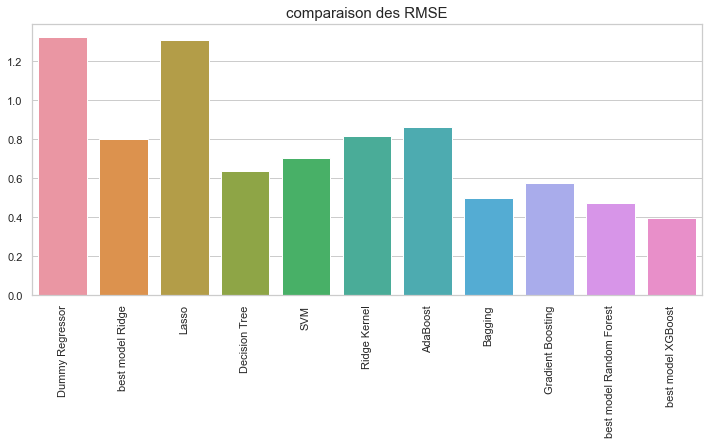

In [133]:
tab=comparaison_model(liste1,liste2)
fig = plt.figure(1, figsize=(12, 5))
sns.barplot(x=tab.iloc[2].index,y=tab.iloc[2].values)
plt.xticks(rotation=90)
plt.title('comparaison des RMSE', size=15)
plt.show()

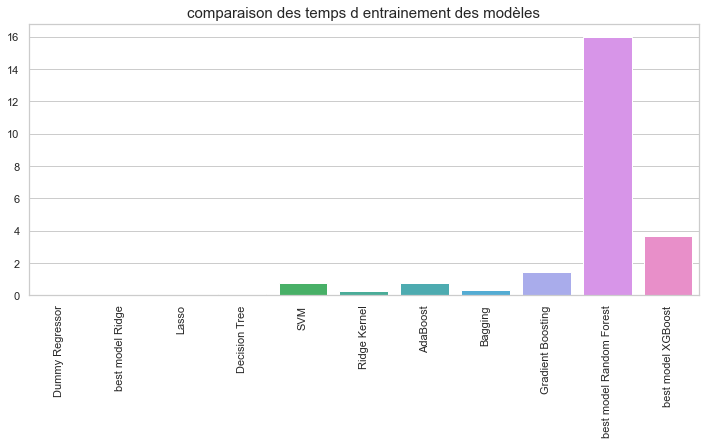

In [134]:
tab=comparaison_model(liste1,liste2)
fig = plt.figure(1, figsize=(12, 5))
sns.barplot(x=tab.iloc[4].index,y=tab.iloc[4].values)
plt.xticks(rotation=90)
plt.title('comparaison des temps d entrainement des modèles', size=15)
plt.show()

Le modele **XGBoost** semble donc être le meilleur de nos modèles.</br>
Il a un temps de calcul moins élevé qye celui du random Forest, et a les meilleurs métriques.</br>
Nous allons travailler pour la suite avec le modèle "model_best" qui contient nos meilleurs paramètres.

### <font color="blue" id="section_B_i">i.  Evaluation du modèle </font>

Nous allons tracer le graphe des prévisions du jeu de test, comparé au jeu de test.
Pour cela, nous allons créer une fonction qui trace le graphique selon le modele, les valeurs du jeu de test, ainsi que 
les valeurs prédites par le meilleur modèle (qui a les meilleurs estimations).

In [135]:
#Fonction qui trace le graphique des données observées par rapport aux données prédites
def graphe_pred_obs(modele, y_test, y_test_predict):
  fig = plt.figure(figsize=(8, 8))
  #"regplot" est utilisée pour tracer des données et un ajustement de modèle de régression linéaire.
  sns.regplot(y = y_test_predict, x = y_test, line_kws={"color": "red"})
  plt.title(modele,fontsize=14)
  plt.xlabel('Données observées')
  plt.ylabel('Données prédites')
  plt.show()

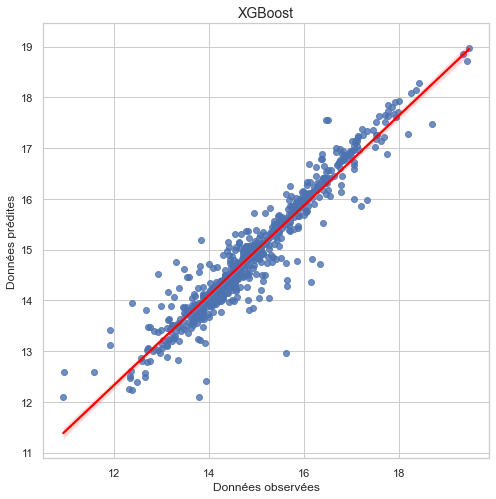

time 0.38s


In [136]:
#mesure du temps d'execution
start_time = timeit.default_timer()

#Graphe des données observées par rapport aux données prédites
graphe_pred_obs('XGBoost',y_test,model_best_xgb.predict(X_test))

#temps d'execution du modèle
time = timeit.default_timer() - start_time
print("time {:.2f}s".format(time))

In [137]:
#métriques de notre meilleur modèle
metriques_regression(np.array(y_test), model_best_xgb.predict(X_test))

MAE:  0.24341328132511791
MSE:  0.15916111341794975
RMSE:  0.39895001368335575
R²:  0.9071180799304529


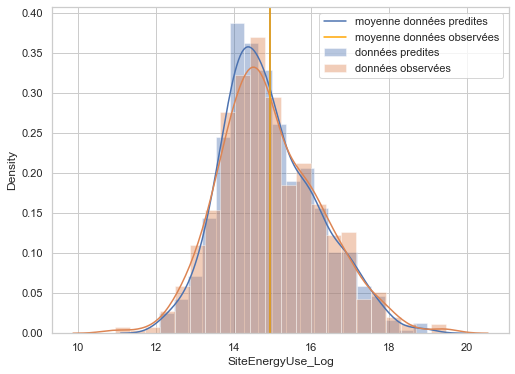

In [138]:
#graphique

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(model_best_xgb.predict(X_test),label='données predites')
plt.axvline(x = np.mean(model_best_xgb.predict(X_test)),label='moyenne données predites')
sns.distplot(y_test,label='données observées' )
plt.axvline(x = np.mean(y_test),label='moyenne données observées',color='orange')
plt.legend()
plt.show()

On observe donc que les données prédites ont très peu de différences avec les données observées de notre séquence de test.

## <font color="red" id="section_C">3. Prédictions des émissions de CO2</font>

Nous allons donc vérifier que le modèle choisi nous permet la prédiction des émissions de carbone.

In [166]:
from sklearn.model_selection import train_test_split

yCO2 = data_concat["TotalGHGEmissions_Log"]

# Création d'un jeu d'entrainement (train set) et d'un jeu de test (test set)

XCO2_train, XCO2_test, yCO2_train, yCO2_test = train_test_split(X,yCO2, test_size=0.2, random_state=0)

In [167]:
# transformation des variables
XCO2_train = preprocessor.fit_transform(XCO2_train)
XCO2_test = preprocessor.transform(XCO2_test)

In [168]:
#On entraine le modèle choisi
model_best_xgb.fit(XCO2_train, yCO2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

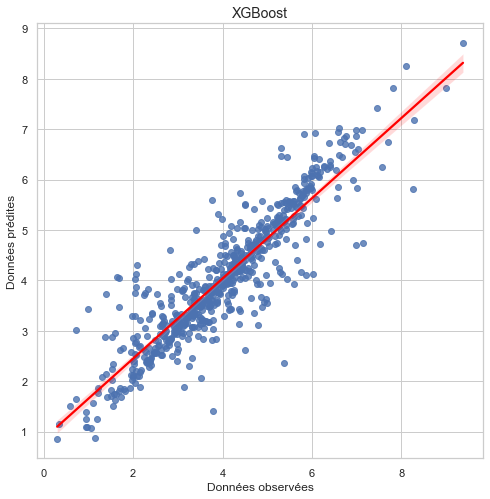

time 0.39s


In [169]:
#mesure du temps d'execution
start_time = timeit.default_timer()


#Graphe des données observées par rapport aux données prédites
graphe_pred_obs('XGBoost',yCO2_test,model_best_xgb.predict(XCO2_test))

#temps d'execution du modèle
time = timeit.default_timer() - start_time
print("time {:.2f}s".format(time))

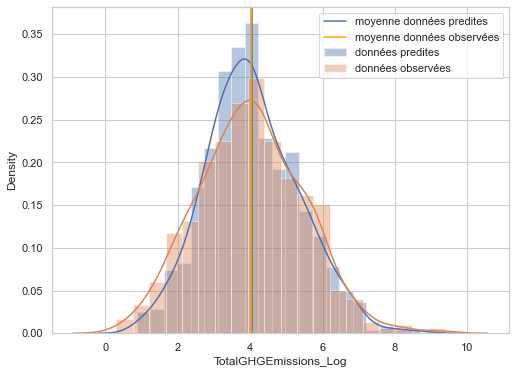

In [170]:
#graphique

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(model_best_xgb.predict(XCO2_test),label='données predites')
plt.axvline(x = np.mean(model_best_xgb.predict(XCO2_test)),label='moyenne données predites')
sns.distplot(yCO2_test,label='données observées' )
plt.axvline(x = np.mean(yCO2_test),label='moyenne données observées',color='orange')
plt.legend()
plt.show()

On voit qu'il y a peu de différences entre les données observées et les données prédites avec ce modèle.
Il peut permettre la prédiction des émissions de carbone.

In [172]:
#On teste ce modèle sur les données X_test, y_test afin d'avoir un aperçu de sa performance dans la vraie vie
metriques_regression(yCO2_test, model_best_xgb.predict(XCO2_test))

MAE:  0.4004464176547794
MSE:  0.3964313961479798
RMSE:  0.629627982341938
R²:  0.8134448095193998


Les métriques sont légèrement moins bons que pour la consommation totale d'énergie mais ils sont corrects.

## <font color="red" id="section_D">3. Evaluation de l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions </font>

Regardons les features importances et de cette manière, nous verrons l'importance de l'ENERGYSTARScore dans notre meilleure 
modèle ainsi que pour les 2 autres modèles choisis.</br> Rappelons que la variable qui prédit la consommation totale 
d’énergie de bâtiments 'SiteEnergyUse_Log' ainsi que celle pour les émissions de CO2 'TotalGHGEmissions_Log' étant 
fortement corrélées,nous pouvons dire que l'intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions sera 
la même que celle pour la consommation totale d’énergie de bâtiments.

In [140]:
def plot_feature_importances(feature_importances, attributes):
    
    # Les features sont triés par importance pour l'affichage graphique
    features = np.array([[feature, attrib] for feature, attrib in sorted(zip(feature_importances, attributes), reverse=True)])
    features_labels = [attrib for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]
    features_values = [value for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]

    # Affichage Bar Plot
    fig = plt.figure(1, figsize=(25, 5))
    plt.subplot(121)
    sns.barplot(x=features_labels[0:20], y=[100*v for v in features_values[0:20]], orient='v')
    plt.ylabel("%")
    plt.title("Features Importances")
    plt.xticks(rotation=90)
    


### <font color="blue" id="section_D_a">a. Feature importances pour le modèle XGBoost final </font>

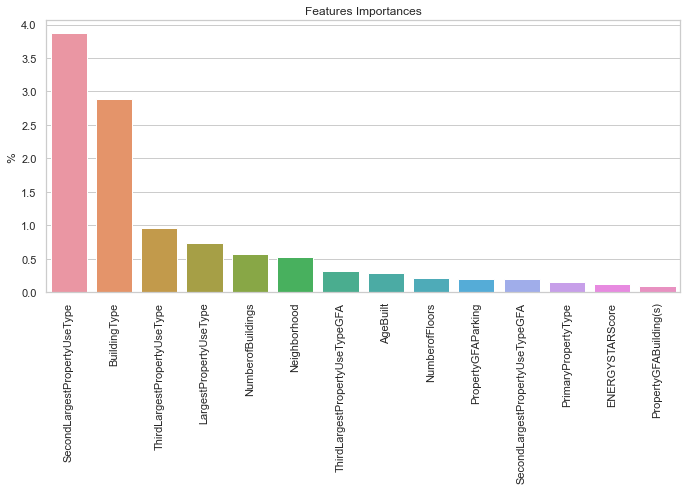

In [141]:
# On récupère les valeurs de l'importance de chaque feature
feature_importances = model_best_xgb.feature_importances_

# Liste de tous les attributs
attributes = data_model

# Affiche le graphique de l'importance des features
plot_feature_importances(feature_importances, attributes)

**Conclusions**:</br>
La variable ENERGYSTARScore a une importance très faible puisqu'elle est de 0.1% environs.
Elle n'a pas d'intérêt dans la consommation d'énergie et donc elle n'en aura pas également dans les émissions de CO2.

### <font color="blue" id="section_D_b">b. Feature importance pour le modèle RandomForest final </font>

Nous allons regarder l'importance de nos variables sur le modèle que nous avions paramétré RandomForest, pour 
vérifier que le résultat sera le même, que pour le XGBoost.

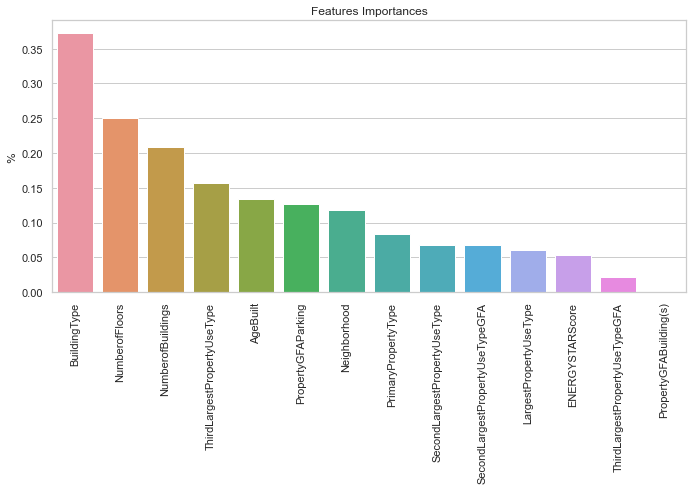

In [142]:
# On récupère les valeurs de l'importance de chaque feature
feature_importances = model_best_F.feature_importances_

# Liste de tous les attributs
attributes = data_model

# Affiche le graphique de l'importance des features
plot_feature_importances(feature_importances, attributes)

Même constat pour le modèle RandomForest (~0.05% d'importance).

### <font color="blue" id="section_D_c">c. Coefficients des variables dans le modèle de régression linéaire Ridge </font>

Vérifions le coefficient des features qui nous indiquera à quel point les caractéristiques sont 
importantes pour le modèle.

In [143]:
#coefficient des features
model_best_Ridge.coef_

array([ 0.6330719 , -0.31479686,  0.04786937, -0.36231619, -0.00382822,
        0.01186983, -0.14979031, -0.23827114,  1.38883686,  0.74041602,
       -0.04254988,  0.96306795,  1.0058262 , -0.62121508, -0.08369481,
       -0.03690037, -0.55541966, -0.87794252,  0.26820206, -1.87965397,
       -0.86128621, -1.12116858, -0.58778223, -0.68037031,  0.44836561,
        0.30714419,  0.46254972,  0.29627751,  0.37044021,  0.09369982,
        1.30833011,  1.36382803,  0.2162328 , -0.45949183, -1.04955001,
       -0.10422662, -0.21913772, -0.18312424,  0.19120673,  0.12608982,
       -1.03576218,  0.23714171,  0.75510448,  0.22631157, -0.00737155,
       -0.02938598, -0.08770671, -0.0092927 , -0.01789808,  0.07047807,
        0.0909365 ,  0.07943958, -0.07640616, -0.00639652, -0.70689035,
       -0.61384674, -0.84222607,  0.22810263,  2.2021875 ,  2.55958926,
        2.5205401 , -0.67458618, -0.48781459, -0.11666687, -0.44942405,
       -1.77701539,  1.38883686, -0.26501251, -0.04254988,  0.68

Vérifions combien d'entités ont un coefficient supérieur à zéro.

In [144]:
np.sum(model_best_Ridge.coef_ >= 0)

95

In [145]:
np.sum(model_best_Ridge.coef_ <= 0)

109

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'BuildingType'),
  Text(1, 0, 'SecondLargestPropertyUseType'),
  Text(2, 0, 'LargestPropertyUseType'),
  Text(3, 0, 'PrimaryPropertyType'),
  Text(4, 0, 'NumberofBuildings'),
  Text(5, 0, 'PropertyGFAParking'),
  Text(6, 0, 'ThirdLargestPropertyUseTypeGFA'),
  Text(7, 0, 'SecondLargestPropertyUseTypeGFA'),
  Text(8, 0, 'Neighborhood'),
  Text(9, 0, 'ENERGYSTARScore'),
  Text(10, 0, 'AgeBuilt'),
  Text(11, 0, 'NumberofFloors'),
  Text(12, 0, 'PropertyGFABuilding(s)'),
  Text(13, 0, 'ThirdLargestPropertyUseType')])

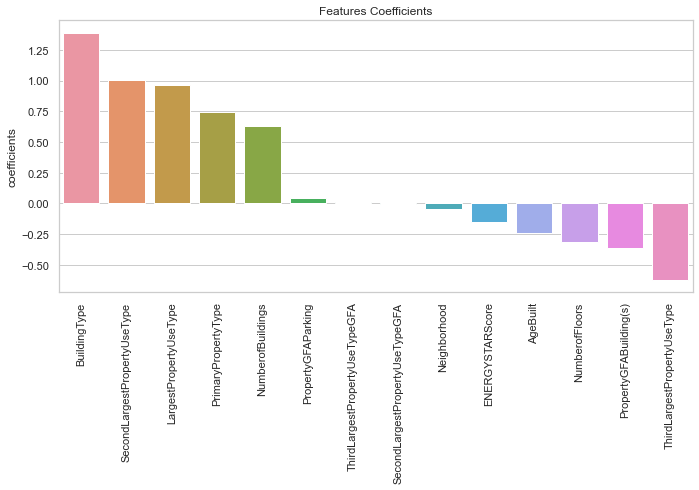

In [146]:
# On récupère les coefficients de chaque feature
feature_coeff = model_best_Ridge.coef_    

# Liste de tous les attributs
attributes = data_model
    
# Les features sont triés par importance pour l'affichage graphique
features = np.array([[feature, attrib] for feature, attrib in sorted(zip(feature_coeff, attributes), reverse=True)])
features_labels = [attrib for value, attrib in sorted(zip(feature_coeff, attributes), reverse=True)]
features_values = [value for value, attrib in sorted(zip(feature_coeff, attributes), reverse=True)]



# Affichage Bar Plot
fig = plt.figure(1, figsize=(25, 5))
plt.subplot(121)
sns.barplot(x=features_labels[0:20], y=features_values[0:20], orient='v')
plt.ylabel("coefficients")
plt.title("Features Coefficients")
plt.xticks(rotation=90)




Nous voyons donc que le coefficient de l'ENERGYSTARScore est négatif et assez faible.
Il est de l'ordre de -0.20.Ce qui signifie qu'il y a une corrélation négative mais faible entre l'ENERGYSTARScore et la consommation
totale d'énergie.Elle n'apporte donc pas grand chose à la prédiction de la consommation d'énergie et donc aux émissions de 
carbone.

On en déduit que l'ENERGYSTARScore importe peu dans notre modèle. Donc, elle n'a pas d'intérêt dans la prédiction de 
consommation énergétique, et donc d'émissions en CO2, puisque ces 2 variables sont fortement corrélées.